In [27]:
import numpy as np
from xgboost import DMatrix, train
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import tensorflow as tf

import geopandas as gpd
import pandas as pd
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

import geopandas as gpd
import numpy as np
import ast

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
from google.colab import drive
import os
gdrive_path='/content/gdrive/MyDrive'

# This will mount your google drive under 'MyDrive'
drive.mount('/content/gdrive', force_remount=True)
# In order to access the files in this notebook we have to navigate to the correct folder
os.chdir(gdrive_path)
# Check manually if all files are present
print(sorted(os.listdir()))

input_file = '/content/gdrive/MyDrive/combined_data.geojson'
## Read combined data
combined_gdf = gpd.read_file(input_file)

Mounted at /content/gdrive
['Colab Notebooks', 'cnn.ipynb', 'combined_data.geojson', 'combined_data4.geojson', 'combined_data_2.geojson', 'combined_data_test.geojson', 'dsinearthobservation', 'mmuq', 'sentinel3_classifier_model.pt', 'sentinel4_classifier_model.pt', 'test3.ipynb']


In [29]:
combined_gdf.head()

,id,B11,B11_1,B11_2,B11_3,B11_4,B11_5,B11_6,B11_7,B12,...,SAVI_2,SAVI_3,SAVI_4,SAVI_5,SAVI_6,SAVI_7,l1_leaf_types,l2_genus,l3_species,geometry
0,00000000000000001285,"[ [ 0.21485000848770142, 0.21485000848770142, ...","[ [ 0.1903499960899353, 0.1903499960899353, 0....","[ [ 0.25090000033378601, 0.25090000033378601, ...","[ [ 0.27590000629425049, 0.27590000629425049, ...","[ [ 0.33129999041557312, 0.33129999041557312, ...","[ [ 0.24779999256134033, 0.24779999256134033, ...","[ [ 0.23039999604225159, 0.23039999604225159, ...","[ [ 0.22169999778270721, 0.22169999778270721, ...","[ [ 0.16689999401569366, 0.16689999401569366, ...",...,"[ [ 0.39631174830858296, 0.39631174830858296, ...","[ [ 0.55305452045583214, 0.55305452045583214, ...","[ [ 0.32503364261808343, 0.32503364261808343, ...","[ [ 0.4849119669517028, 0.4849119669517028, 0....","[ [ 0.48122582581074502, 0.48122582581074502, ...","[ [ 0.40244614590277028, 0.40244614590277028, ...",broadleaf,long-lived deciduous,cherry,POINT (9.54019 53.31623)
1,00000000000000001286,"[ [ 0.33660000562667847, 0.35670000314712524, ...","[ [ 0.33300000429153442, 0.35320001840591431, ...","[ [ 0.28929999470710754, 0.30529999732971191, ...","[ [ 0.26129999756813049, 0.28119999170303345, ...","[ [ 0.37709999084472656, 0.32580000162124634, ...","[ [ 0.28955000638961792, 0.29154998064041138, ...","[ [ 0.31150001287460327, 0.30840000510215759, ...","[ [ 0.24230000376701355, 0.26144999265670776, ...","[ [ 0.26420000195503235, 0.26940000057220459, ...",...,"[ [ 0.54692960690394188, 0.55778100494918248, ...","[ [ 0.54185463510324394, 0.56372674270926748, ...","[ [ 0.47251693458409605, 0.49028291537961177, ...","[ [ 0.42076625232747428, 0.43495920161586377, ...","[ [ 0.38681262096254188, 0.41391076449448849, ...","[ [ 0.41490896087121831, 0.42305687667139713, ...",broadleaf,long-lived deciduous,cherry,POINT (11.24813 52.96863)
2,00000000000000001287,"[ [ 0.2653999924659729, 0.2653999924659729, 0....","[ [ 0.28429999947547913, 0.27000001072883606, ...","[ [ 0.24220000207424164, 0.24140000343322754, ...","[ [ 0.2517000138759613, 0.24930000305175781, 0...","[ [ 0.2533000111579895, 0.25560000538825989, 0...","[ [ 0.23090000450611115, 0.23160000145435333, ...","[ [ 0.2252500057220459, 0.22914999723434448, 0...","[ [ 0.21860000491142273, 0.22269999980926514, ...","[ [ 0.21109999716281891, 0.21220000088214874, ...",...,"[ [ 0.40388566897410833, 0.40270262413394109, ...","[ [ 0.46156861297822194, 0.4651250830132162, 0...","[ [ 0.4446366862292388, 0.44051400156954879, 0...","[ [ 0.40859836629330087, 0.40619363599003477, ...","[ [ 0.43007543360566797, 0.42469024788021992, ...","[ [ 0.30783937846043619, 0.35890525126129236, ...",broadleaf,long-lived deciduous,cherry,POINT (10.82358 53.22204)
3,00000000000000001288,"[ [ 0.24580000340938568, 0.24580000340938568, ...","[ [ 0.26639997959136963, 0.26639997959136963, ...","[ [ 0.25529998540878296, 0.25529998540878296, ...","[ [ 0.23899999260902405, 0.23899999260902405, ...","[ [ 0.26620000600814819, 0.26620000600814819, ...","[ [ 0.22995001077651978, 0.22995001077651978, ...","[ [ 0.19350001215934753, 0.19350001215934753, ...","[ [ 0.19534999132156372, 0.19534999132156372, ...","[ [ 0.19120000302791595, 0.19120000302791595, ...",...,"[ [ 0.40740022352607863, 0.40740022352607863, ...","[ [ 0.45163308990462608, 0.45163308990462608, ...","[ [ 0.41925646712227038, 0.41925646712227038, ...","[ [ 0.33190708565992011, 0.33190708565992011, ...","[ [ 0.18240198639756083, 0.18240198639756083, ...","[ [ 0.21644593105202947, 0.21644593105202947, ...",broadleaf,long-lived deciduous,cherry,POINT (11.25195 52.9704)
4,00000000000000001289,"[ [ 0.27639999985694885, 0.27639999985694885, ...","[ [ 0.28290000557899475, 0.28290000557899475, ...","[ [ 0.25290000438690186, 0.25290000438690186, ...","[ [ 0.2614000141620636, 0.2614000141620636, 0....","[ [ 0.26410001516342163, 0.26410001516342163, ...","[ [ 0.24199999868869781, 0.24199999868869781, ...","[ [ 0.24314999580383301, 0.243149995803

In [30]:
csdf = combined_gdf
#csdf.drop(columns=['id'], inplace=True)
print(csdf.isnull().sum())

id                  0
B11                 0
B11_1            5483
B11_2             133
B11_3               3
                 ... 
SAVI_7           3779
l1_leaf_types       0
l2_genus            0
l3_species          0
geometry            0
Length: 125, dtype: int64


In [31]:
# for now we just dorp the None
csdf_cleaned = csdf.dropna().reset_index(drop=True)
csdf_cleaned.drop(columns=['id'], inplace=True)
print(csdf_cleaned.shape)
print(csdf_cleaned.isnull().any())
print(csdf_cleaned.columns.to_list())

(26268, 124)
B11              False
B11_1            False
B11_2            False
B11_3            False
B11_4            False
                 ...  
SAVI_7           False
l1_leaf_types    False
l2_genus         False
l3_species       False
geometry         False
Length: 124, dtype: bool
['B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B11_7', 'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7', 'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B3', 'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B3_7', 'B4', 'B4_1', 'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B4_7', 'B5', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B5_7', 'B6', 'B6_1', 'B6_2', 'B6_3', 'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4', 'B7_5', 'B7_6', 'B7_7', 'B8', 'B8A', 'B8A_1', 'B8A_2', 'B8A_3', 'B8A_4', 'B8A_5', 'B8A_6', 'B8A_7', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6', 'B8_7', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5',

In [32]:
# for now, we just select the NDVI, and keep id&species
select_col = ['B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B11_7',
              'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7',
              'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B3',
              'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B3_7', 'B4', 'B4_1',
              'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B4_7', 'B5', 'B5_1', 'B5_2',
              'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B5_7', 'B6', 'B6_1', 'B6_2', 'B6_3',
              'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4',
              'B7_5', 'B7_6', 'B7_7', 'B8', 'B8A', 'B8A_1', 'B8A_2', 'B8A_3', 'B8A_4',
              'B8A_5', 'B8A_6', 'B8A_7', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6',
              'B8_7', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5',
              'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6',
              'EVI_7', 'NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6',
              'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6',
              'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7',
              'l1_leaf_types', 'l2_genus', 'l3_species']
select_df = csdf_cleaned[select_col]

In [33]:
# load the labels
labels = np.array(select_df[['l1_leaf_types', 'l2_genus','l3_species']])
sen2 = np.array(select_df[['B11', 'B11_1', 'B11_2', 'B11_3', 'B11_4', 'B11_5', 'B11_6', 'B11_7',
              'B12', 'B12_1', 'B12_2', 'B12_3', 'B12_4', 'B12_5', 'B12_6', 'B12_7',
              'B2', 'B2_1', 'B2_2', 'B2_3', 'B2_4', 'B2_5', 'B2_6', 'B2_7', 'B3',
              'B3_1', 'B3_2', 'B3_3', 'B3_4', 'B3_5', 'B3_6', 'B3_7', 'B4', 'B4_1',
              'B4_2', 'B4_3', 'B4_4', 'B4_5', 'B4_6', 'B4_7', 'B5', 'B5_1', 'B5_2',
              'B5_3', 'B5_4', 'B5_5', 'B5_6', 'B5_7', 'B6', 'B6_1', 'B6_2', 'B6_3',
              'B6_4', 'B6_5', 'B6_6', 'B6_7', 'B7', 'B7_1', 'B7_2', 'B7_3', 'B7_4',
              'B7_5', 'B7_6', 'B7_7', 'B8', 'B8A', 'B8A_1', 'B8A_2', 'B8A_3', 'B8A_4',
              'B8A_5', 'B8A_6', 'B8A_7', 'B8_1', 'B8_2', 'B8_3', 'B8_4', 'B8_5', 'B8_6',
              'B8_7', 'EVI', 'EVI2', 'EVI2_1', 'EVI2_2', 'EVI2_3', 'EVI2_4', 'EVI2_5',
              'EVI2_6', 'EVI2_7', 'EVI_1', 'EVI_2', 'EVI_3', 'EVI_4', 'EVI_5', 'EVI_6',
              'EVI_7', 'NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5', 'NDVI_6',
              'NDVI_7', 'NDWI', 'NDWI_1', 'NDWI_2', 'NDWI_3', 'NDWI_4', 'NDWI_5', 'NDWI_6',
              'NDWI_7', 'SAVI', 'SAVI_1', 'SAVI_2', 'SAVI_3', 'SAVI_4', 'SAVI_5', 'SAVI_6', 'SAVI_7']])
# show the shape
print("Labels shape: " + str(labels.shape))
#print("Sen2 shape: " + str(sen2.shape))

# print the labels
print(labels[:])
print(sen2[:])
print(sen2.shape)

Labels shape: (26268, 3)
[['broadleaf' 'long-lived deciduous' 'cherry']
 ['broadleaf' 'long-lived deciduous' 'cherry']
 ['broadleaf' 'long-lived deciduous' 'cherry']
 ...
 ['needleleaf' 'spruce' 'norway spruce']
 ['needleleaf' 'spruce' 'norway spruce']
 ['needleleaf' 'spruce' 'norway spruce']]
[['[ [ 0.21485000848770142, 0.21485000848770142, 0.22670000791549683, 0.22670000791549683, 0.22670000791549683 ], [ 0.21485000848770142, 0.21485000848770142, 0.22670000791549683, 0.22670000791549683, 0.22670000791549683 ], [ 0.22214999794960022, 0.22214999794960022, 0.23935000598430634, 0.23935000598430634, 0.23935000598430634 ], [ 0.22214999794960022, 0.22214999794960022, 0.23935000598430634, 0.23935000598430634, 0.23935000598430634 ], [ 0.22865000367164612, 0.22865000367164612, 0.23004999756813049, 0.23004999756813049, 0.23004999756813049 ] ]'
  '[ [ 0.1903499960899353, 0.1903499960899353, 0.20374999940395355, 0.20374999940395355, 0.20374999940395355 ], [ 0.1903499960899353, 0.1903499960899353,

In [34]:
import ast
import numpy as np

number_samples = sen2.shape[0]
number_features = sen2.shape[1]  # should 120

print("Pre-processed Sentinel-2 data shape: ", sen2.shape)

# Each string is parsed using a nested list derivation and converted to a float32 array
X1 = np.array([[ast.literal_eval(x) for x in row] for row in sen2], dtype=np.float32)

# The shape of X should be (N, 120, 25, 25).
print("Post-processed Sentinel-2 data shape: ", X1.shape)


Pre-processed Sentinel-2 data shape:  (26268, 120)
Post-processed Sentinel-2 data shape:  (26268, 120, 5, 5)


In [35]:
from sklearn.preprocessing import OneHotEncoder
df_xg = select_df.copy()
# Step 1: Prepare Data
labels_raw_l1 = np.array(df_xg['l1_leaf_types'])
labels_raw_l2 = np.array(df_xg['l2_genus'])
labels_raw_l3 = np.array(df_xg['l3_species'])

# Step 2: One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)

# Encode l1_leaf_types
labels_l1 = encoder.fit_transform(labels_raw_l1.reshape(-1, 1))
print("L1 Labels shape:", labels_l1.shape)
print("\nFirst 10 rows of L1:")
print(labels_l1[:10])

print("\nUnique L1 species in first 19 samples:")
print(df_xg['l1_leaf_types'][:19].unique())

print("\nAll unique L1 species:")
print(df_xg['l1_leaf_types'].unique())

print("\nL1 Species distribution:")
print(df_xg['l1_leaf_types'].value_counts())

# Encode l2_genus
labels_l2 = encoder.fit_transform(labels_raw_l2.reshape(-1, 1))
print("\nL2 Labels shape:", labels_l2.shape)
print("\nFirst 10 rows of L2:")
print(labels_l2[:10])

print("\nUnique L2 genus in first 19 samples:")
print(df_xg['l2_genus'][:19].unique())

print("\nAll unique L2 genus:")
print(df_xg['l2_genus'].unique())

print("\nL2 Genus distribution:")
print(df_xg['l2_genus'].value_counts())

# Encode l3_species
labels_l3 = encoder.fit_transform(labels_raw_l3.reshape(-1, 1))
print("\nL3 Labels shape:", labels_l3.shape)
print("\nFirst 10 rows of L3:")
print(labels_l3[:10])

print("\nUnique L3 species in first 19 samples:")
print(df_xg['l3_species'][:19].unique())

print("\nAll unique L3 species:")
print(df_xg['l3_species'].unique())

print("\nL3 Species distribution:")
print(df_xg['l3_species'].value_counts())


L1 Labels shape: (26268, 2)

First 10 rows of L1:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

Unique L1 species in first 19 samples:
['broadleaf']

All unique L1 species:
['broadleaf' 'needleleaf']

L1 Species distribution:
l1_leaf_types
broadleaf     14110
needleleaf    12158
Name: count, dtype: int64

L2 Labels shape: (26268, 9)

First 10 rows of L2:
[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]

Unique L2 genus in first 19 samples:
['long-lived deciduous']

All unique L2 genus:
['long-lived deciduous' 'short-lived deciduous' 'oak' 'beech'
 'douglas fir' 'fir' 'larch' 'pine' 'spruce']

L2 Genus distribution:
l2_genus
pine                     5012
oak                      4531
short-live

In [43]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim.lr_scheduler import LambdaLR
from torch.cuda.amp import GradScaler, autocast
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
from torchvision import transforms

class PatchEmbed(nn.Module):
    def __init__(self, in_chans=120, patch_size=1, embed_dim=512, img_size=(5, 5)):
        super().__init__()
        self.patch_size = patch_size
        self.in_chans = in_chans
        self.embed_dim = embed_dim

        # compute patch size
        self.num_patches_h = img_size[0] // patch_size
        self.num_patches_w = img_size[1] // patch_size
        self.num_patches = self.num_patches_h * self.num_patches_w

        # The vector size of a single patch
        patch_vec_size = patch_size * patch_size * in_chans
        self.proj = nn.Sequential(
            nn.Linear(patch_vec_size, embed_dim * 2),
            nn.LayerNorm(embed_dim * 2),
            nn.GELU(),
            nn.Linear(embed_dim * 2, embed_dim)
        )

    def forward(self, x):
        B, C, H, W = x.shape
        assert (H % self.patch_size == 0) and (W % self.patch_size == 0)

        patches = x.unfold(2, self.patch_size, self.patch_size)
        patches = patches.unfold(3, self.patch_size, self.patch_size)
        patches = patches.permute(0, 2, 3, 1, 4, 5)
        patches = patches.reshape(B, self.num_patches, -1)
        x = self.proj(patches)
        return x

class Attention(nn.Module):
    def __init__(self, dim, num_heads=8, dropout=0.0):
        super().__init__()
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = head_dim ** -0.5

        self.qkv = nn.Linear(dim, dim * 3)
        self.attn_drop = nn.Dropout(dropout)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(dropout)

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_drop(attn)

        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x

class TransformerBlock(nn.Module):
    def __init__(self, dim, num_heads, mlp_ratio=4., dropout=0.0):
        super().__init__()
        self.norm1 = nn.LayerNorm(dim)
        self.attn = Attention(dim, num_heads=num_heads, dropout=dropout)
        self.norm2 = nn.LayerNorm(dim)
        self.mlp = nn.Sequential(
            nn.Linear(dim, int(dim * mlp_ratio)),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(int(dim * mlp_ratio), dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

class ImprovedFeatureExtractor(nn.Module):
    def __init__(self,
                 in_chans=120, img_size=(5, 5), patch_size=1,
                 embed_dim=256, #512,
                 depth=4, #8,
                 num_heads=4, #8,
                 mlp_ratio=2., #4.,
                 dropout=0.1):
        super().__init__()
        self.patch_embed = PatchEmbed(in_chans, patch_size, embed_dim, img_size)

        num_patches = (img_size[0] // patch_size) * (img_size[1] // patch_size)
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches, embed_dim))
        self.pos_drop = nn.Dropout(dropout)

        self.blocks = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads, mlp_ratio, dropout)
            for _ in range(depth)
        ])

        self.norm = nn.LayerNorm(embed_dim)
        self.init_weights()

    def init_weights(self):
        nn.init.trunc_normal_(self.pos_embed, std=0.02)

    def forward(self, x):
        x = self.patch_embed(x)
        x = x + self.pos_embed
        x = self.pos_drop(x)

        for block in self.blocks:
            x = block(x)

        x = self.norm(x)
        x = x.mean(dim=1)  # Global average pooling
        return x

class ImprovedHierarchicalClassifierV2(nn.Module):
    def __init__(self,
                 feature_extractor: nn.Module,
                 d_model=256, #512,
                 hidden_dim=128, #256,  # Reduce the hidden layer dimension
                 num_classes_l1=2,
                 num_classes_l2=9,
                 num_classes_l3=19,
                 dropout=0.3):
        super().__init__()
        self.base = feature_extractor

        # 1. Feature Processing
        self.feature_norm = nn.Sequential(
            nn.BatchNorm1d(d_model),
            nn.LayerNorm(d_model),
            nn.Dropout(dropout)
        )

        # 2. Shared Feature Extractor
        self.shared_extractor = nn.Sequential(
            nn.Linear(d_model, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # 3. L1 classifier (simplest task with smallest network) 3. L1分类器 (最简单的任务，用最小的网络)
        self.fc_l1 = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim // 2, num_classes_l1)
        )

        # L1 embedding
        self.l1_embed = nn.Sequential(
            nn.Linear(num_classes_l1, hidden_dim // 4),
            nn.BatchNorm1d(hidden_dim // 4),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # 4. L2 classifier
        self.fc_l2 = nn.Sequential(
            nn.Linear(hidden_dim + hidden_dim // 4, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim // 2, num_classes_l2)
        )

        # L2 embedding
        self.l2_embed = nn.Sequential(
            nn.Linear(num_classes_l2, hidden_dim // 4),
            nn.BatchNorm1d(hidden_dim // 4),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # 5. L3 classifier (the most complex task, with the largest network). L3分类器 (最复杂的任务，用最大的网络)
        self.fc_l3 = nn.Sequential(
            nn.Linear(hidden_dim + hidden_dim // 4, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim // 2, num_classes_l3)
        )

        # 6. initialize
        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

    def forward(self, x, temperature=1.0):
        # 1. Feature extraction 特征提取
        features = self.base(x)
        features = self.feature_norm(features)

        # 2. Share extraction
        shared_features = self.shared_extractor(features)

        # 3. L1 predict
        logits_l1 = self.fc_l1(shared_features)
        # Using temperature to softer predictions
        soft_l1 = F.softmax(logits_l1 / temperature, dim=-1)
        l1_embedded = self.l1_embed(soft_l1)

        # 4. L2 predict
        l2_input = torch.cat([shared_features, l1_embedded], dim=1)
        logits_l2 = self.fc_l2(l2_input)
        soft_l2 = F.softmax(logits_l2 / temperature, dim=-1)
        l2_embedded = self.l2_embed(soft_l2)

        # 5. L3 predict
        l3_input = torch.cat([shared_features, l2_embedded], dim=1)
        logits_l3 = self.fc_l3(l3_input)

        return {
            "logits_l1": logits_l1,
            "logits_l2": logits_l2,
            "logits_l3": logits_l3,
            "probs_l1": F.softmax(logits_l1, dim=-1),
            "probs_l2": F.softmax(logits_l2, dim=-1),
            "probs_l3": F.softmax(logits_l3, dim=-1)
        }


class HierarchicalLoss(nn.Module):
    def __init__(self, weights_l1, weights_l2, weights_l3, label_smoothing=0.1):
        super().__init__()
        self.weights_l1 = weights_l1
        self.weights_l2 = weights_l2
        self.weights_l3 = weights_l3
        self.label_smoothing = label_smoothing

    def forward(self, outputs, targets):
        # Cross entropy with label smoothing
        def smooth_cross_entropy(logits, targets, weight):
            num_classes = logits.size(-1)
            smooth_targets = torch.zeros_like(logits).scatter_(
                1, targets.unsqueeze(1), 1
            )
            smooth_targets = smooth_targets * (1 - self.label_smoothing) + \
                           self.label_smoothing / num_classes
            log_probs = F.log_softmax(logits, dim=-1)
            loss = -(smooth_targets * log_probs).sum(dim=-1)
            if weight is not None:
                loss = loss * weight[targets]
            return loss.mean()

        loss_l1 = smooth_cross_entropy(outputs["logits_l1"], targets[:, 0], self.weights_l1)
        loss_l2 = smooth_cross_entropy(outputs["logits_l2"], targets[:, 1], self.weights_l2)
        loss_l3 = smooth_cross_entropy(outputs["logits_l3"], targets[:, 2], self.weights_l3)

        # KL divergence for consistency
        kl_loss_l1 = F.kl_div(
            F.log_softmax(outputs["logits_l1"], dim=1),
            F.softmax(outputs["logits_l1"].detach(), dim=1),
            reduction='batchmean'
        )
        kl_loss_l2 = F.kl_div(
            F.log_softmax(outputs["logits_l2"], dim=1),
            F.softmax(outputs["logits_l2"].detach(), dim=1),
            reduction='batchmean'
        )
        kl_loss_l3 = F.kl_div(
            F.log_softmax(outputs["logits_l3"], dim=1),
            F.softmax(outputs["logits_l3"].detach(), dim=1),
            reduction='batchmean'
        )

        # Total loss
        loss = (loss_l1 + loss_l2 + loss_l3) + \
               0.1 * (kl_loss_l1 + kl_loss_l2 + kl_loss_l3)

        return loss, {
            "l1": loss_l1.item(),
            "l2": loss_l2.item(),
            "l3": loss_l3.item()
        }

class ImageDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        super().__init__()
        self.images = torch.tensor(images, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        if self.transform:
            image = self.transform(image)
        return image, self.labels[idx]

def get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps, num_cycles=0.5):
    def lr_lambda(current_step):
        if current_step < num_warmup_steps:
            return float(current_step) / float(max(1, num_warmup_steps))
        progress = float(current_step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * float(num_cycles) * 2.0 * progress)))
    return LambdaLR(optimizer, lr_lambda)



In [37]:
# class MixUpAugmentation:
#     """
#     MixUp数据增强
#     """
#     def __init__(self, alpha=0.2):
#         self.alpha = alpha

#     def __call__(self, x, y):
#         if self.alpha > 0:
#             lam = np.random.beta(self.alpha, self.alpha)
#         else:
#             lam = 1

#         batch_size = x.size(0)
#         index = torch.randperm(batch_size).to(x.device)

#         mixed_x = lam * x + (1 - lam) * x[index]
#         mixed_y = lam * y + (1 - lam) * y[index]
#         return mixed_x, mixed_y

# def hierarchical_focal_loss(outputs, targets, gamma=2.0, alpha=None):
#     """
#     Focal Loss for hierarchical classification
#     """
#     def focal_loss(logits, target, gamma, alpha):
#         ce_loss = F.cross_entropy(logits, target, reduction='none')
#         pt = torch.exp(-ce_loss)
#         focal_loss = (1 - pt) ** gamma * ce_loss
#         if alpha is not None:
#             focal_loss = alpha[target] * focal_loss
#         return focal_loss.mean()

#     loss_l1 = focal_loss(outputs["logits_l1"], targets[:, 0], gamma, alpha)
#     loss_l2 = focal_loss(outputs["logits_l2"], targets[:, 1], gamma, alpha)
#     loss_l3 = focal_loss(outputs["logits_l3"], targets[:, 2], gamma, alpha)

#     # 按难度加权
#     total_loss = 0.2 * loss_l1 + 0.3 * loss_l2 + 0.5 * loss_l3
#     return total_loss

In [38]:
# 首先定义设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def compute_metrics(outputs, targets):
    """
Calculate the accuracy of each level

Args:
outputs: Dictionary of model outputs, including logits_l1, logits_l2, logits_l3
targets: Real label shape: (batch_size, 3)

Returns:
tuple: (l1_accuracy, l2_accuracy, l3_accuracy)
    """
    with torch.no_grad():
        # L1 Accuracy rate
        preds_l1 = outputs["logits_l1"].argmax(dim=1)
        acc_l1 = (preds_l1 == targets[:, 0]).float().mean().item()

        # L2 Accuracy rate
        preds_l2 = outputs["logits_l2"].argmax(dim=1)
        acc_l2 = (preds_l2 == targets[:, 1]).float().mean().item()

        # L3 Accuracy rate
        preds_l3 = outputs["logits_l3"].argmax(dim=1)
        acc_l3 = (preds_l3 == targets[:, 2]).float().mean().item()

        return acc_l1, acc_l2, acc_l3


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.cuda.amp import GradScaler, autocast
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt

# Make sure these definitions are complete before use
print(f"Using device: {device}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")

Using device: cuda
CUDA available: True
CUDA device: Tesla T4


In [13]:
# def train_model_v2(X, labels, batch_size=32, num_epochs=200):
#     # 1. 数据准备
#     dataset = ImageDataset(X, labels)
#     train_size = int(0.7 * len(dataset))
#     val_size = int(0.15 * len(dataset))
#     test_size = len(dataset) - train_size - val_size

#     train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

#     train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
#     val_loader = DataLoader(val_set, batch_size=batch_size*2, shuffle=False)
#     test_loader = DataLoader(test_set, batch_size=batch_size*2, shuffle=False)

#     # 2. 模型初始化
#     feature_extractor = ImprovedFeatureExtractor(
#         in_chans=120,
#         img_size=(5, 5),
#         patch_size=1,
#         embed_dim=512,
#         depth=8,
#         num_heads=8,
#         dropout=0.3
#     )

#     model = ImprovedHierarchicalClassifierV2(
#         feature_extractor=feature_extractor,
#         d_model=512,
#         hidden_dim=256,
#         num_classes_l1=2,
#         num_classes_l2=9,
#         num_classes_l3=19,
#         dropout=0.5
#     ).to(device)

#     # 3. 优化器设置
#     optimizer = torch.optim.AdamW(
#         model.parameters(),
#         lr=1e-4,
#         weight_decay=0.1,
#         betas=(0.9, 0.999)
#     )

#     # 4. 学习率调度器
#     scheduler = torch.optim.lr_scheduler.OneCycleLR(
#         optimizer,
#         max_lr=1e-3,
#         epochs=num_epochs,
#         steps_per_epoch=len(train_loader),
#         pct_start=0.1,
#         anneal_strategy='cos'
#     )

#     # 5. 其他设置
#     mixup = MixUpAugmentation(alpha=0.2)
#     scaler = GradScaler()
#     temperature_schedule = torch.linspace(2.0, 1.0, num_epochs)

#     # 6. 训练循环
#     best_val_loss = float('inf')
#     patience = 20
#     no_improve_count = 0

#     for epoch in range(num_epochs):
#         model.train()
#         train_loss = 0.0
#         train_acc_l1, train_acc_l2, train_acc_l3 = 0.0, 0.0, 0.0
#         current_temp = temperature_schedule[epoch]

#         for batch_idx, (x, y) in enumerate(train_loader):
#             x, y = x.to(device), y.to(device)

#             # MixUp
#             if epoch < num_epochs // 2:  # 只在前半段训练使用MixUp
#                 x, y = mixup(x, y.float())

#             optimizer.zero_grad()

#             with autocast():
#                 outputs = model(x, temperature=current_temp)
#                 loss = hierarchical_focal_loss(outputs, y.long())

#             scaler.scale(loss).backward()
#             scaler.unscale_(optimizer)
#             torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
#             scaler.step(optimizer)
#             scaler.update()
#             scheduler.step()

#             train_loss += loss.item()

#             # 计算准确率
#             if epoch >= num_epochs // 2:  # 不在MixUp期间计算准确率
#                 a1, a2, a3 = compute_metrics(outputs, y)
#                 train_acc_l1 += a1
#                 train_acc_l2 += a2
#                 train_acc_l3 += a3

#         # 验证
#         model.eval()
#         val_loss = 0.0
#         val_acc_l1, val_acc_l2, val_acc_l3 = 0.0, 0.0, 0.0

#         with torch.no_grad():
#             for x, y in val_loader:
#                 x, y = x.to(device), y.to(device)
#                 outputs = model(x, temperature=1.0)
#                 loss = hierarchical_focal_loss(outputs, y.long())
#                 val_loss += loss.item()

#                 a1, a2, a3 = compute_metrics(outputs, y)
#                 val_acc_l1 += a1
#                 val_acc_l2 += a2
#                 val_acc_l3 += a3

#         # 计算平均值
#         train_loss /= len(train_loader)
#         val_loss /= len(val_loader)

#         if epoch >= num_epochs // 2:
#             train_acc_l1 /= len(train_loader)
#             train_acc_l2 /= len(train_loader)
#             train_acc_l3 /= len(train_loader)

#         val_acc_l1 /= len(val_loader)
#         val_acc_l2 /= len(val_loader)
#         val_acc_l3 /= len(val_loader)

#         # 早停
#         if val_loss < best_val_loss:
#             best_val_loss = val_loss
#             best_state = model.state_dict()
#             no_improve_count = 0
#             print("[*] Best model saved")
#         else:
#             no_improve_count += 1
#             if no_improve_count >= patience:
#                 print(f"Early stopping triggered at epoch {epoch+1}")
#                 break

#         print(f"Epoch [{epoch+1}/{num_epochs}]")
#         print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
#         print(f"Train Acc: L1={train_acc_l1:.4f}, L2={train_acc_l2:.4f}, L3={train_acc_l3:.4f}")
#         print(f"Val   Acc: L1={val_acc_l1:.4f}, L2={val_acc_l2:.4f}, L3={val_acc_l3:.4f}")

#     return model, history



In [39]:
def train_model_v2(X, labels, batch_size=32, num_epochs=80):
    # =========================
    # 1. Prepare datasets & DataLoader
    # =========================
    dataset = ImageDataset(X, labels)
    train_size = int(0.7 * len(dataset))
    val_size   = int(0.2 * len(dataset))
    test_size  = len(dataset) - train_size - val_size

    # Fixed random seeds to ensure repeatability
    generator = torch.Generator().manual_seed(42)
    train_set, val_set, test_set = random_split(
        dataset, [train_size, val_size, test_size],
        generator=generator
    )
    test_loader = DataLoader(test_set, batch_size=32, shuffle=False)
    # if GPU is big enough, can increase batch_size，比如64，提高稳定性
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_set,   batch_size=batch_size, shuffle=False)
    test_loader  = DataLoader(test_set,  batch_size=batch_size, shuffle=False)

    # =========================
    # 2. initialize model
    # =========================
    # （1）Transformer Feature extractor
    feature_extractor = ImprovedFeatureExtractor(
        in_chans=120,
        img_size=(5, 5),
        patch_size=1,
        embed_dim=256,
        depth=4,
        num_heads=4,
        mlp_ratio=2.,
        dropout=0.1         # Transforme internal dropout
    )

    # （2）Multilevel classifier
    model = ImprovedHierarchicalClassifierV2(
        feature_extractor=feature_extractor,
        d_model=256,
        hidden_dim=128,
        num_classes_l1=2,
        num_classes_l2=9,
        num_classes_l3=19,
        dropout=0.2         #Appropriately reduce the dropout of the fully connected part to make training more stable
    ).to(device)

    # =========================
    # 3. Optimizer and learning rate scheduling
    # =========================
    lr = 5e-5             # Make the original 1e-4 smaller, such as 5e-5
    weight_decay = 1e-5   # Reduced regular intensity from 1e-4

    from torch.optim import AdamW
    optimizer = AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

# Use CosineAnnealingLR, but keep the cycle short and then keep the LR low later
# For example, T_max=40, when training for 80 epochs, the cosine decreases about the first 40 epochs,
# The next 40 epoch LRS are basically low and more smoothly fine-tuned
    from torch.optim.lr_scheduler import CosineAnnealingLR
    scheduler = CosineAnnealingLR(optimizer, T_max=40)

    # Raise your patience so that it allows for short-term fluctuations in validation sets
    patience = 15

    best_val_loss = float('inf')
    best_state = None
    no_improve_count = 0

    history = {
        "train_loss": [], "val_loss": [],
        "train_acc_l1": [], "val_acc_l1": [],
        "train_acc_l2": [], "val_acc_l2": [],
        "train_acc_l3": [], "val_acc_l3": [],
    }

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        train_acc_l1, train_acc_l2, train_acc_l3 = 0, 0, 0

        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(x_batch)

            # Basic multilevel classification loss
            loss_l1 = F.cross_entropy(outputs["logits_l1"], y_batch[:, 0])
            loss_l2 = F.cross_entropy(outputs["logits_l2"], y_batch[:, 1])
            loss_l3 = F.cross_entropy(outputs["logits_l3"], y_batch[:, 2])
            loss = 0.2*loss_l1 + 0.3*loss_l2 + 0.5*loss_l3

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Training set accuracy
            pred_l1 = outputs["logits_l1"].argmax(dim=1)
            pred_l2 = outputs["logits_l2"].argmax(dim=1)
            pred_l3 = outputs["logits_l3"].argmax(dim=1)
            train_acc_l1 += (pred_l1 == y_batch[:,0]).float().mean().item()
            train_acc_l2 += (pred_l2 == y_batch[:,1]).float().mean().item()
            train_acc_l3 += (pred_l3 == y_batch[:,2]).float().mean().item()

        # Scheduler update
        scheduler.step()

        # Average training loss and accuracy
        train_loss = running_loss / len(train_loader)
        train_acc_l1 /= len(train_loader)
        train_acc_l2 /= len(train_loader)
        train_acc_l3 /= len(train_loader)

        # verify
        model.eval()
        val_loss = 0.0
        val_acc_l1, val_acc_l2, val_acc_l3 = 0, 0, 0

        with torch.no_grad():
            for x_val, y_val in val_loader:
                x_val, y_val = x_val.to(device), y_val.to(device)
                outputs = model(x_val)

                loss_l1 = F.cross_entropy(outputs["logits_l1"], y_val[:,0])
                loss_l2 = F.cross_entropy(outputs["logits_l2"], y_val[:,1])
                loss_l3 = F.cross_entropy(outputs["logits_l3"], y_val[:,2])
                loss = 0.2*loss_l1 + 0.3*loss_l2 + 0.5*loss_l3

                val_loss += loss.item()

                p_l1 = outputs["logits_l1"].argmax(dim=1)
                p_l2 = outputs["logits_l2"].argmax(dim=1)
                p_l3 = outputs["logits_l3"].argmax(dim=1)
                val_acc_l1 += (p_l1 == y_val[:,0]).float().mean().item()
                val_acc_l2 += (p_l2 == y_val[:,1]).float().mean().item()
                val_acc_l3 += (p_l3 == y_val[:,2]).float().mean().item()

        val_loss /= len(val_loader)
        val_acc_l1 /= len(val_loader)
        val_acc_l2 /= len(val_loader)
        val_acc_l3 /= len(val_loader)

        # record & Early Stopping
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_acc_l1"].append(train_acc_l1)
        history["val_acc_l1"].append(val_acc_l1)
        history["train_acc_l2"].append(train_acc_l2)
        history["val_acc_l2"].append(val_acc_l2)
        history["train_acc_l3"].append(train_acc_l3)
        history["val_acc_l3"].append(val_acc_l3)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_state = {k: v.clone() for k, v in model.state_dict().items()}
            no_improve_count = 0
            print(f"[*] Best model saved at epoch {epoch+1}")
        else:
            no_improve_count += 1
            if no_improve_count >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

        print(f"Epoch [{epoch+1}/{num_epochs}] "
              f"Train Loss: {train_loss:.4f}  Val Loss: {val_loss:.4f} "
              f"| Train Acc(L1/L2/L3): {train_acc_l1:.3f}/{train_acc_l2:.3f}/{train_acc_l3:.3f} "
              f"| Val Acc(L1/L2/L3): {val_acc_l1:.3f}/{val_acc_l2:.3f}/{val_acc_l3:.3f}")

    # Recovery best model
    if best_state is not None:
        model.load_state_dict(best_state)

    return model, history


In [40]:
def plot_training_history(history):
    """
    Drawing training history
    """
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(20, 10))

    # 1. Loss curve
    plt.subplot(2, 2, 1)
    plt.plot(epochs, history['train_loss'], 'b-', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # 2. L1 accuracy rate
    plt.subplot(2, 2, 2)
    plt.plot(epochs, history['train_acc_l1'], 'b-', label='Train L1')
    plt.plot(epochs, history['val_acc_l1'], 'r-', label='Val L1')
    plt.title('L1 (Leaf Types) Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # 3. L2 accuracy rate
    plt.subplot(2, 2, 3)
    plt.plot(epochs, history['train_acc_l2'], 'b-', label='Train L2')
    plt.plot(epochs, history['val_acc_l2'], 'r-', label='Val L2')
    plt.title('L2 (Genus) Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # 4. L3 accuracy rate
    plt.subplot(2, 2, 4)
    plt.plot(epochs, history['train_acc_l3'], 'b-', label='Train L3')
    plt.plot(epochs, history['val_acc_l3'], 'r-', label='Val L3')
    plt.title('L3 (Species) Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


In [41]:
def evaluate_model(model, test_loader, device, label_encoders):
    """
    Evaluate the model and generate confusion matrices and classification reports
    for all three levels of the hierarchy.
    """
    model.eval()

    # Initialize lists to store predictions and true labels
    all_preds_l1, all_preds_l2, all_preds_l3 = [], [], []
    all_labels_l1, all_labels_l2, all_labels_l3 = [], [], []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch = x_batch.to(device)
            outputs = model(x_batch)

            # Get predictions for each level
            preds_l1 = outputs["logits_l1"].argmax(dim=1).cpu().numpy()
            preds_l2 = outputs["logits_l2"].argmax(dim=1).cpu().numpy()
            preds_l3 = outputs["logits_l3"].argmax(dim=1).cpu().numpy()

            # Store predictions and true labels
            all_preds_l1.extend(preds_l1)
            all_preds_l2.extend(preds_l2)
            all_preds_l3.extend(preds_l3)

            all_labels_l1.extend(y_batch[:, 0].cpu().numpy())
            all_labels_l2.extend(y_batch[:, 1].cpu().numpy())
            all_labels_l3.extend(y_batch[:, 2].cpu().numpy())

    # Convert predictions to original class names
    pred_classes_l1 = label_encoders['l1'].inverse_transform(all_preds_l1)
    pred_classes_l2 = label_encoders['l2'].inverse_transform(all_preds_l2)
    pred_classes_l3 = label_encoders['l3'].inverse_transform(all_preds_l3)

    true_classes_l1 = label_encoders['l1'].inverse_transform(all_labels_l1)
    true_classes_l2 = label_encoders['l2'].inverse_transform(all_labels_l2)
    true_classes_l3 = label_encoders['l3'].inverse_transform(all_labels_l3)

    # Generate confusion matrices
    cm_l1 = confusion_matrix(true_classes_l1, pred_classes_l1)
    cm_l2 = confusion_matrix(true_classes_l2, pred_classes_l2)
    cm_l3 = confusion_matrix(true_classes_l3, pred_classes_l3)

    # Generate classification reports
    report_l1 = classification_report(true_classes_l1, pred_classes_l1, output_dict=True)
    report_l2 = classification_report(true_classes_l2, pred_classes_l2, output_dict=True)
    report_l3 = classification_report(true_classes_l3, pred_classes_l3, output_dict=True)

    return {
        'confusion_matrices': {
            'l1': cm_l1,
            'l2': cm_l2,
            'l3': cm_l3
        },
        'classification_reports': {
            'l1': report_l1,
            'l2': report_l2,
            'l3': report_l3
        },
        'predictions': {
            'l1': pred_classes_l1,
            'l2': pred_classes_l2,
            'l3': pred_classes_l3
        },
        'true_labels': {
            'l1': true_classes_l1,
            'l2': true_classes_l2,
            'l3': true_classes_l3
        }
    }

def plot_confusion_matrix(cm, classes, level, cmap=plt.cm.Blues):
    """
    Plot confusion matrix with proper formatting
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(f'Confusion Matrix - Level {level}')
    plt.colorbar()

    # Add class labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha='right')
    plt.yticks(tick_marks, classes)

    # Add numbers to the cells
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

def print_classification_report_summary(reports):
    """
    Print a summary of classification reports for all levels
    """
    for level, report in reports.items():
        print(f"\n=== Classification Report - Level {level} ===")
        print(f"Accuracy: {report['accuracy']:.3f}")
        print("\nClass-wise Performance:")
        for class_name, metrics in report.items():
            if isinstance(metrics, dict):
                print(f"\n{class_name}:")
                print(f"  Precision: {metrics['precision']:.3f}")
                print(f"  Recall: {metrics['recall']:.3f}")
                print(f"  F1-score: {metrics['f1-score']:.3f}")
                print(f"  Support: {metrics['support']}")

# Example usage:
def evaluate_and_visualize(model, test_loader, device, label_encoders):
    """
    Evaluate the model and visualize results
    """
    # Get evaluation results
    results = evaluate_model(model, test_loader, device, label_encoders)

    # Plot confusion matrices
    for level in ['l1', 'l2', 'l3']:
        cm = results['confusion_matrices'][level]
        classes = label_encoders[level].classes_
        plot_confusion_matrix(cm, classes, level)
        plt.show()

    # Print classification reports
    print_classification_report_summary(results['classification_reports'])

    return results


Using device: cuda

Dataset Information:
Number of samples: 26268
Input shape: (26268, 120, 5, 5)
Labels shape: (26268, 3)

Class distribution:
L1 classes: 2 classes: ['broadleaf' 'needleleaf']
L2 classes: 9 classes: ['beech' 'douglas fir' 'fir' 'larch' 'long-lived deciduous' 'oak' 'pine'
 'short-lived deciduous' 'spruce']
L3 classes: 19 classes: ['alder' 'birch' 'black pine' 'cherry' 'douglas fir' 'english oak'
 'european ash' 'european beech' 'european larch' 'japanese larch'
 'linden' 'norway spruce' 'poplar' 'red oak' 'scots pine' 'sessile oak'
 'silver fir' 'sycamore maple' 'weymouth pine']

L1 Distribution:
broadleaf: 14110 samples (53.72%)
needleleaf: 12158 samples (46.28%)
[*] Best model saved at epoch 1
Epoch [1/200] Train Loss: 3.3472  Val Loss: 1.8507 | Train Acc(L1/L2/L3): 0.732/0.234/0.109 | Val Acc(L1/L2/L3): 0.860/0.390/0.267
[*] Best model saved at epoch 2
Epoch [2/200] Train Loss: 2.5172  Val Loss: 1.6134 | Train Acc(L1/L2/L3): 0.813/0.341/0.212 | Val Acc(L1/L2/L3): 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


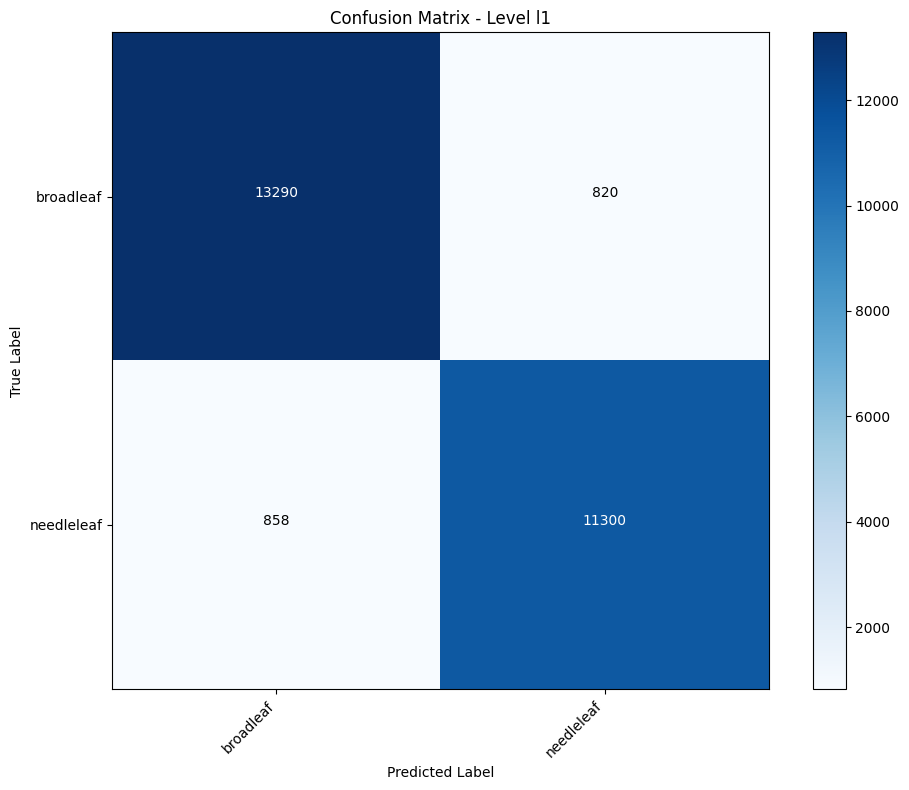

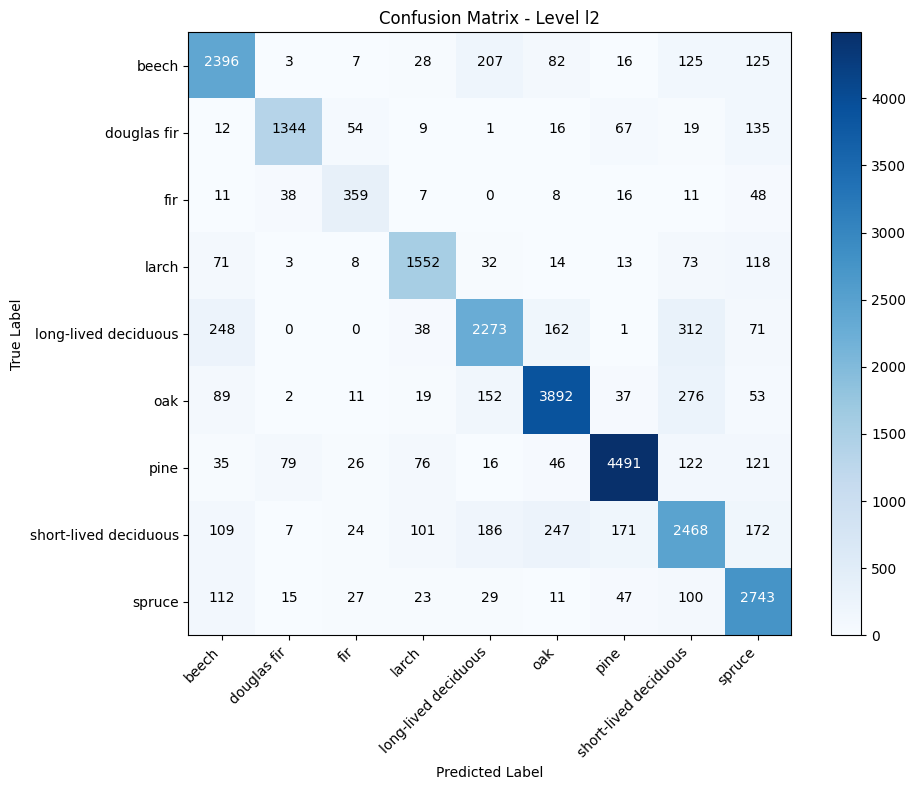

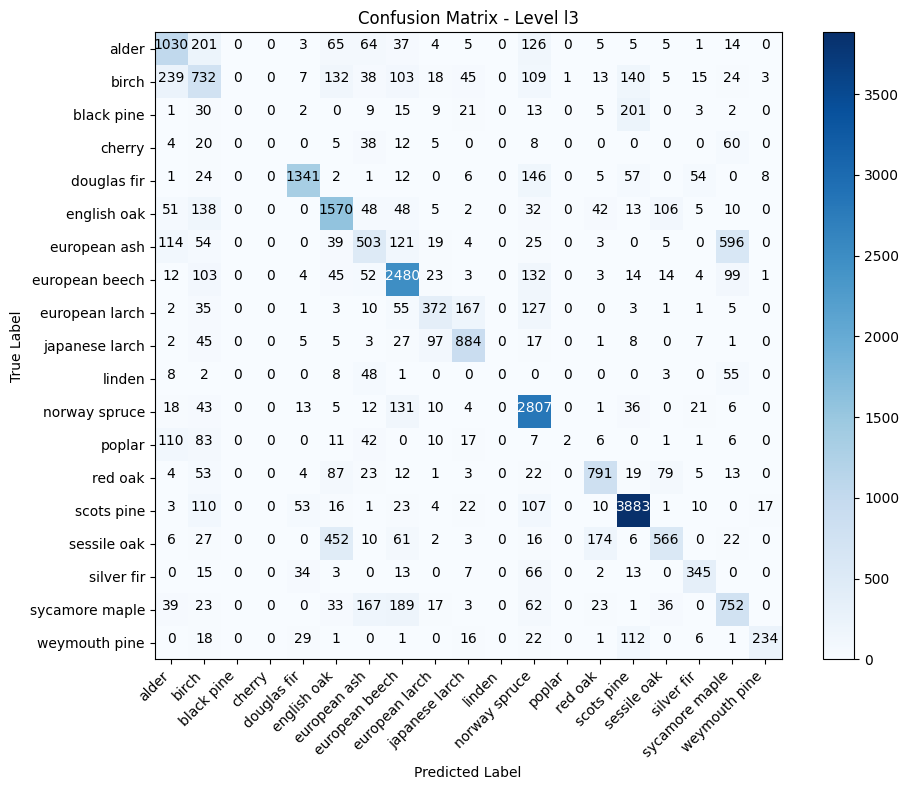


=== Classification Report - Level l1 ===
Accuracy: 0.936

Class-wise Performance:

broadleaf:
  Precision: 0.939
  Recall: 0.942
  F1-score: 0.941
  Support: 14110.0

needleleaf:
  Precision: 0.932
  Recall: 0.929
  F1-score: 0.931
  Support: 12158.0

macro avg:
  Precision: 0.936
  Recall: 0.936
  F1-score: 0.936
  Support: 26268.0

weighted avg:
  Precision: 0.936
  Recall: 0.936
  F1-score: 0.936
  Support: 26268.0

=== Classification Report - Level l2 ===
Accuracy: 0.819

Class-wise Performance:

beech:
  Precision: 0.777
  Recall: 0.802
  F1-score: 0.789
  Support: 2989.0

douglas fir:
  Precision: 0.901
  Recall: 0.811
  F1-score: 0.854
  Support: 1657.0

fir:
  Precision: 0.696
  Recall: 0.721
  F1-score: 0.708
  Support: 498.0

larch:
  Precision: 0.838
  Recall: 0.824
  F1-score: 0.831
  Support: 1884.0

long-lived deciduous:
  Precision: 0.785
  Recall: 0.732
  F1-score: 0.758
  Support: 3105.0

oak:
  Precision: 0.869
  Recall: 0.859
  F1-score: 0.864
  Support: 4531.0

pin

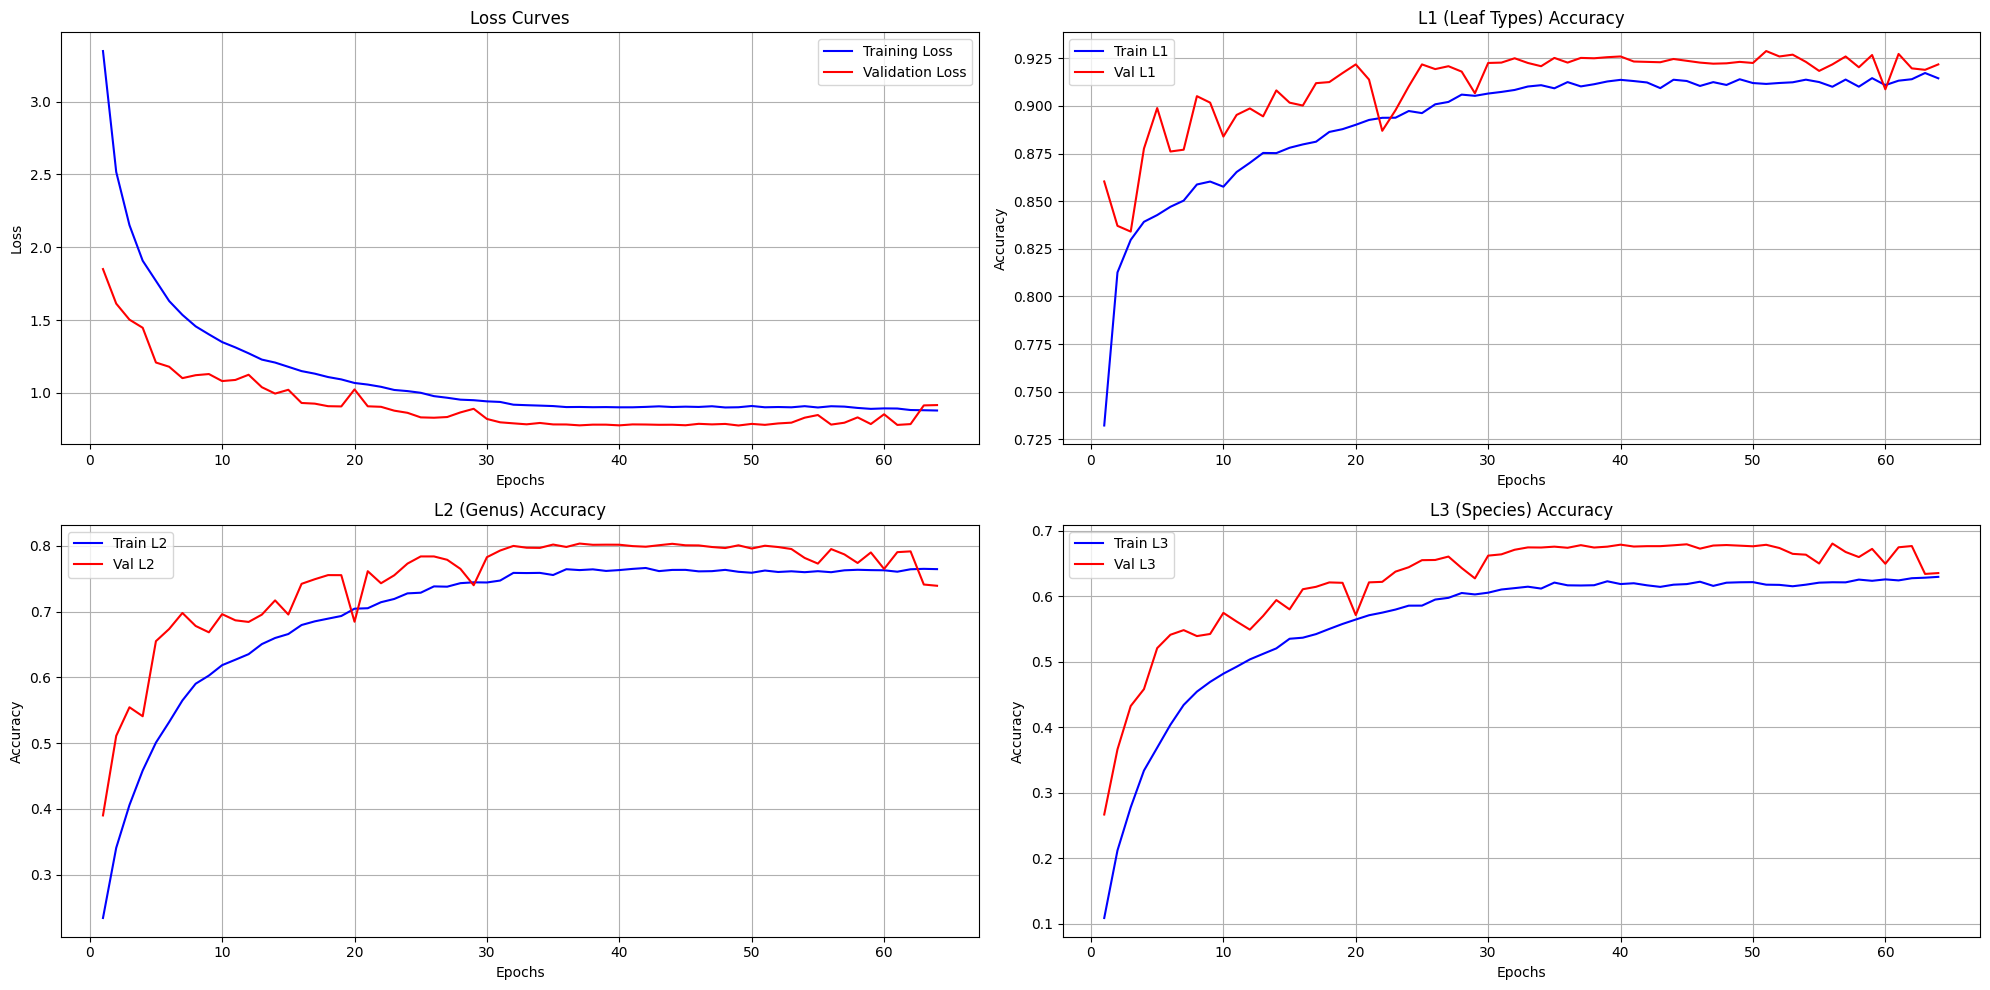


Testing predictions on a sample:

Predictions:
L1: broadleaf (confidence: 0.93)
L2: short-lived deciduous (confidence: 0.52)
L3: alder (confidence: 0.26)

True labels:
L1: broadleaf
L2: long-lived deciduous
L3: cherry


In [42]:
if __name__ == "__main__":
    # Setup device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Use X1 data that has already been processed
    X = X1  # shape: (35965, 120, 5, 5)

    # Preparing label data
    df_xg = select_df.copy()
    labels_raw_l1 = np.array(df_xg['l1_leaf_types'])
    labels_raw_l2 = np.array(df_xg['l2_genus'])
    labels_raw_l3 = np.array(df_xg['l3_species'])

    # Use LabelEncoder instead of OneHotEncoder
    from sklearn.preprocessing import LabelEncoder

    # Encode each level
    le_l1 = LabelEncoder()
    le_l2 = LabelEncoder()
    le_l3 = LabelEncoder()

    # Conversion tag
    l1 = le_l1.fit_transform(labels_raw_l1).reshape(-1, 1)
    l2 = le_l2.fit_transform(labels_raw_l2).reshape(-1, 1)
    l3 = le_l3.fit_transform(labels_raw_l3).reshape(-1, 1)

    # Merge tag
    labels = np.hstack([l1, l2, l3])

    # Print data set information
    print("\nDataset Information:")
    print(f"Number of samples: {len(X)}")
    print(f"Input shape: {X.shape}")
    print(f"Labels shape: {labels.shape}")
    print("\nClass distribution:")
    print("L1 classes:", len(le_l1.classes_), "classes:", le_l1.classes_)
    print("L2 classes:", len(le_l2.classes_), "classes:", le_l2.classes_)
    print("L3 classes:", len(le_l3.classes_), "classes:", le_l3.classes_)

    # Prints the distribution for each class
    print("\nL1 Distribution:")
    for i, cls in enumerate(le_l1.classes_):
        count = (l1 == i).sum()
        print(f"{cls}: {count} samples ({count/len(l1)*100:.2f}%)")

    # Train the model (make sure to use the correct function name)
    model, history = train_model_v2(
        X=X,
        labels=labels,
        batch_size=32,
        num_epochs=200
    )
    # Create test data loader (Assuming X, labels, and ImageDataset are defined)
    test_dataset = ImageDataset(X, labels)  # Or a subset of X and labels for the test set
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Create label encoder dictionary
    label_encoders = {
        'l1': le_l1,
        'l2': le_l2,
        'l3': le_l3
    }

    results = evaluate_and_visualize(model, test_loader, device, label_encoders)
    # Save the model and encoder
    save_dict = {
        'model_state_dict': model.state_dict(),
        'history': history,
        'model_config': {
            'in_chans': 120,
            'img_size': (5, 5),
            'num_classes_l1': len(le_l1.classes_),
            'num_classes_l2': len(le_l2.classes_),
            'num_classes_l3': len(le_l3.classes_)
        },
        'label_encoders': {
            'l1': le_l1,
            'l2': le_l2,
            'l3': le_l3
        }
    }

    save_path = 'sentinel2_classifier_model.pt'
    torch.save(save_dict, save_path)
    print(f"\nModel saved to {save_path}")

    # Drawing training history
    plot_training_history(history)

    # Defining prediction function
    def predict_sample(model, x, encoders):
        """
        Make a prediction on a single sample and return the actual category name
        """
        model.eval()
        with torch.no_grad():
            # Make sure you use the right equipment
            x = torch.tensor(x).float().unsqueeze(0).to(device)
            outputs = model(x, temperature=1.0)  # Predictions are made using fixed temperatures

            pred_l1 = encoders['l1'].inverse_transform([outputs['logits_l1'].argmax(dim=1).cpu().numpy()[0]])[0]
            pred_l2 = encoders['l2'].inverse_transform([outputs['logits_l2'].argmax(dim=1).cpu().numpy()[0]])[0]
            pred_l3 = encoders['l3'].inverse_transform([outputs['logits_l3'].argmax(dim=1).cpu().numpy()[0]])[0]

            probs_l1 = F.softmax(outputs['logits_l1'], dim=1).cpu().numpy()[0]
            probs_l2 = F.softmax(outputs['logits_l2'], dim=1).cpu().numpy()[0]
            probs_l3 = F.softmax(outputs['logits_l3'], dim=1).cpu().numpy()[0]

            return {
                'predictions': {
                    'l1_leaf_types': pred_l1,
                    'l2_genus': pred_l2,
                    'l3_species': pred_l3
                },
                'probabilities': {
                    'l1': probs_l1.max(),
                    'l2': probs_l2.max(),
                    'l3': probs_l3.max()
                }
            }

    # test predictions
    print("\nTesting predictions on a sample:")
    test_sample = X[0]
    true_labels = {
        'l1': labels_raw_l1[0],
        'l2': labels_raw_l2[0],
        'l3': labels_raw_l3[0]
    }

    pred = predict_sample(model, test_sample, save_dict['label_encoders'])
    print("\nPredictions:")
    print("L1:", pred['predictions']['l1_leaf_types'], f"(confidence: {pred['probabilities']['l1']:.2f})")
    print("L2:", pred['predictions']['l2_genus'], f"(confidence: {pred['probabilities']['l2']:.2f})")
    print("L3:", pred['predictions']['l3_species'], f"(confidence: {pred['probabilities']['l3']:.2f})")
    print("\nTrue labels:")
    print("L1:", true_labels['l1'])
    print("L2:", true_labels['l2'])
    print("L3:", true_labels['l3'])

# data4




Using device: cuda

Dataset Information:
Number of samples: 35965
Input shape: (35965, 120, 5, 5)
Labels shape: (35965, 3)

Class distribution:
L1 classes: 2 classes: ['broadleaf' 'needleleaf']
L2 classes: 9 classes: ['beech' 'douglas fir' 'fir' 'larch' 'long-lived deciduous' 'oak' 'pine'
 'short-lived deciduous' 'spruce']
L3 classes: 19 classes: ['alder' 'birch' 'black pine' 'cherry' 'douglas fir' 'english oak'
 'european ash' 'european beech' 'european larch' 'japanese larch'
 'linden' 'norway spruce' 'poplar' 'red oak' 'scots pine' 'sessile oak'
 'silver fir' 'sycamore maple' 'weymouth pine']

L1 Distribution:
broadleaf: 19571 samples (54.42%)
needleleaf: 16394 samples (45.58%)
[*] Best model saved at epoch 1
Epoch [1/200] Train Loss: 3.0117  Val Loss: 1.7983 | Train Acc(L1/L2/L3): 0.769/0.243/0.153 | Val Acc(L1/L2/L3): 0.855/0.376/0.321
[*] Best model saved at epoch 2
Epoch [2/200] Train Loss: 2.3174  Val Loss: 1.5419 | Train Acc(L1/L2/L3): 0.813/0.334/0.248 | Val Acc(L1/L2/L3): 0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


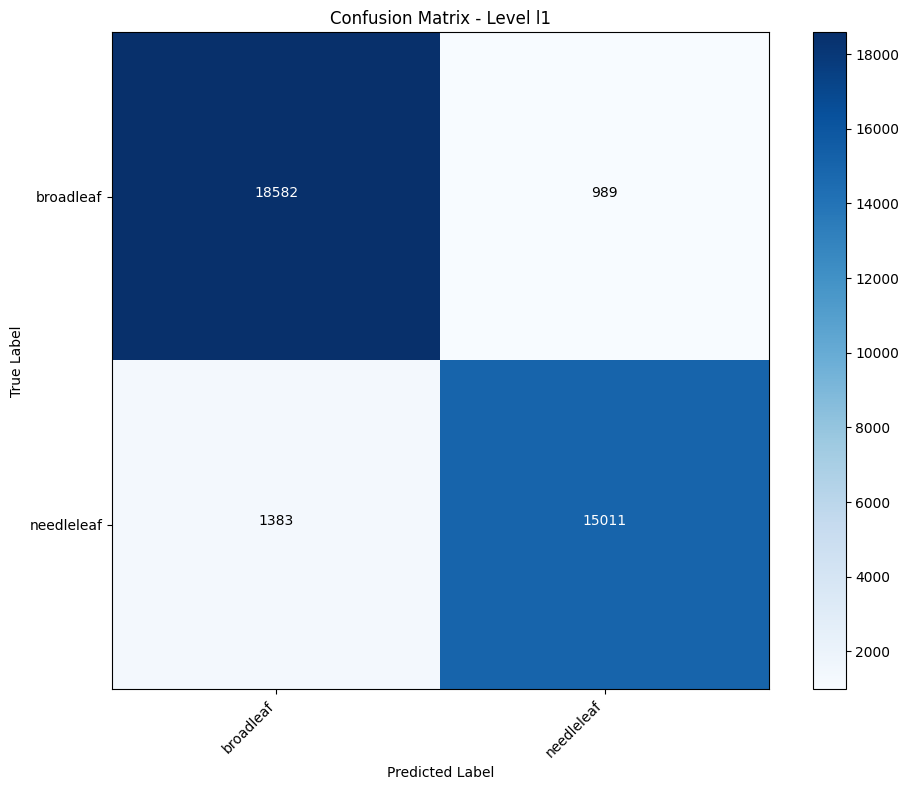

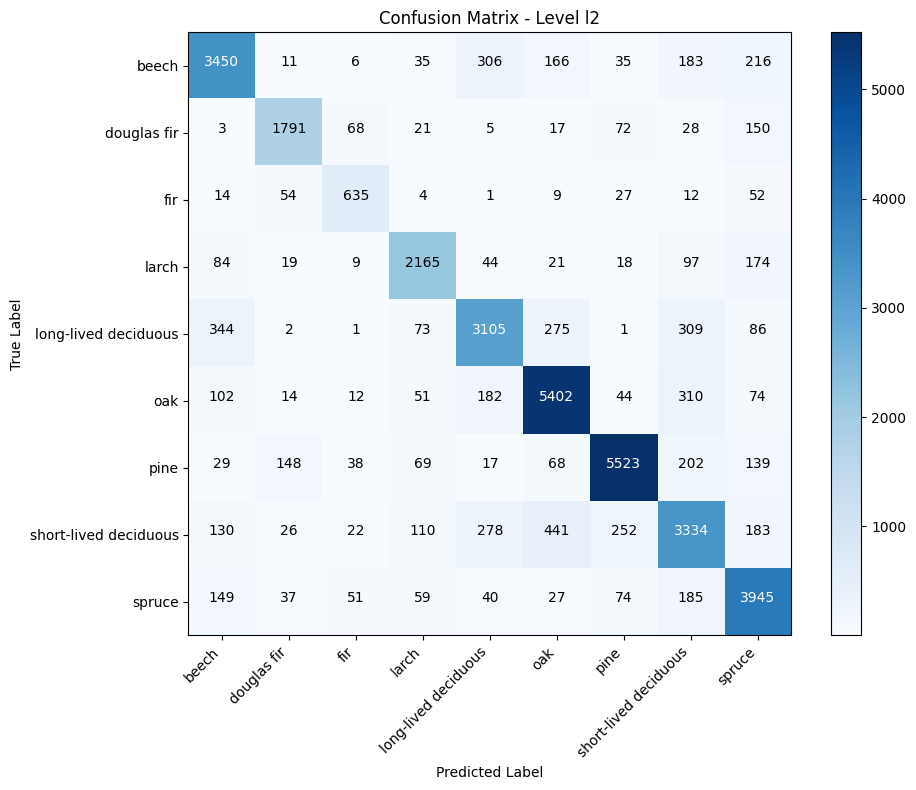

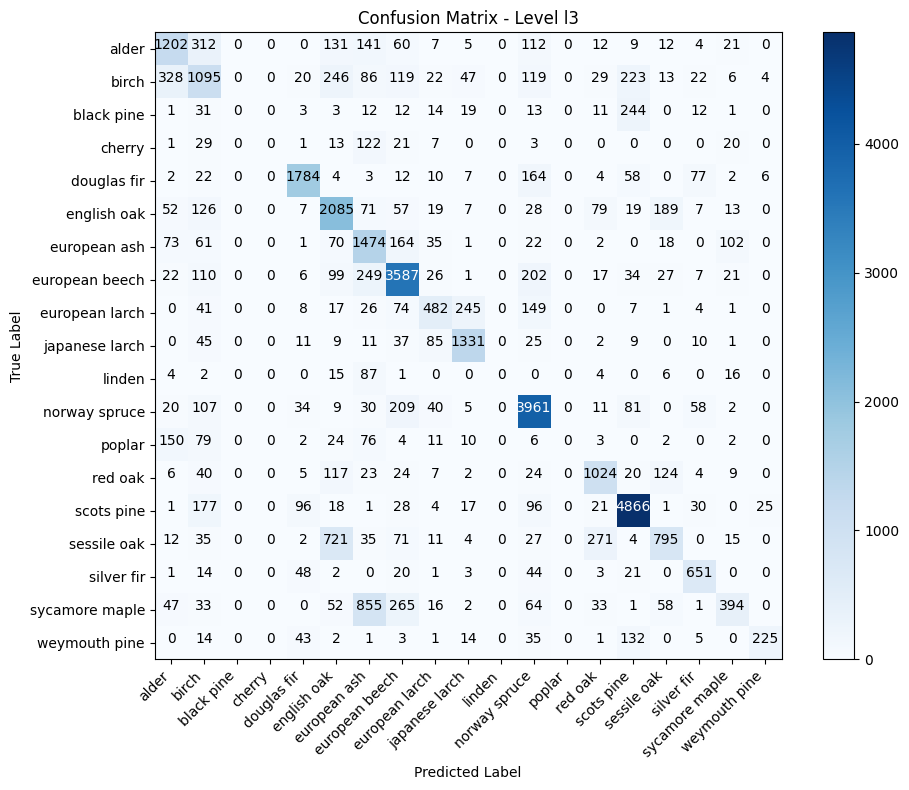


=== Classification Report - Level l1 ===
Accuracy: 0.934

Class-wise Performance:

broadleaf:
  Precision: 0.931
  Recall: 0.949
  F1-score: 0.940
  Support: 19571.0

needleleaf:
  Precision: 0.938
  Recall: 0.916
  F1-score: 0.927
  Support: 16394.0

macro avg:
  Precision: 0.934
  Recall: 0.933
  F1-score: 0.933
  Support: 35965.0

weighted avg:
  Precision: 0.934
  Recall: 0.934
  F1-score: 0.934
  Support: 35965.0

=== Classification Report - Level l2 ===
Accuracy: 0.816

Class-wise Performance:

beech:
  Precision: 0.801
  Recall: 0.783
  F1-score: 0.792
  Support: 4408.0

douglas fir:
  Precision: 0.852
  Recall: 0.831
  F1-score: 0.841
  Support: 2155.0

fir:
  Precision: 0.754
  Recall: 0.786
  F1-score: 0.770
  Support: 808.0

larch:
  Precision: 0.837
  Recall: 0.823
  F1-score: 0.830
  Support: 2631.0

long-lived deciduous:
  Precision: 0.781
  Recall: 0.740
  F1-score: 0.760
  Support: 4196.0

oak:
  Precision: 0.841
  Recall: 0.873
  F1-score: 0.856
  Support: 6191.0

pin

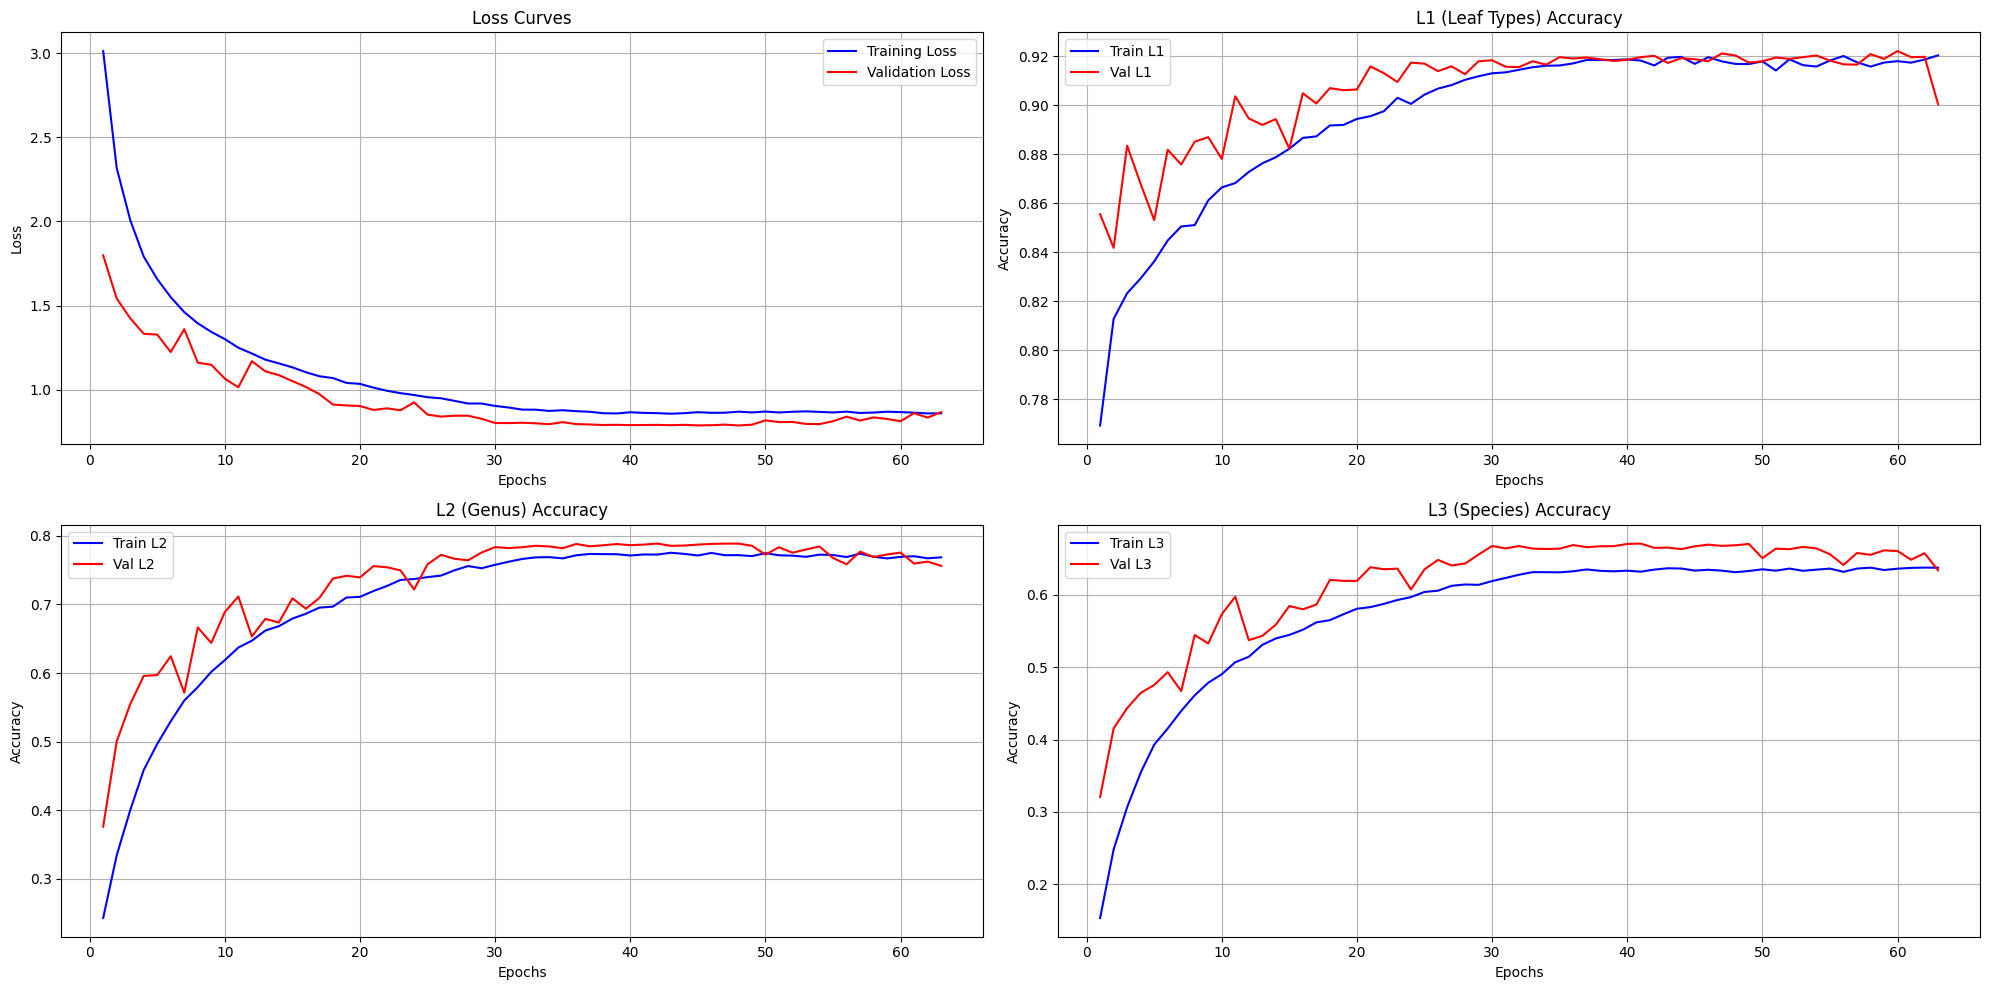


Testing predictions on a sample:

Predictions:
L1: broadleaf (confidence: 1.00)
L2: oak (confidence: 0.56)
L3: sessile oak (confidence: 0.22)

True labels:
L1: broadleaf
L2: long-lived deciduous
L3: linden


In [24]:
if __name__ == "__main__":
    # 设置设备
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # 使用已经处理好的 X1 数据
    X = X1  # shape: (35965, 120, 5, 5)

    # 准备标签数据
    df_xg = select_df.copy()
    labels_raw_l1 = np.array(df_xg['l1_leaf_types'])
    labels_raw_l2 = np.array(df_xg['l2_genus'])
    labels_raw_l3 = np.array(df_xg['l3_species'])

    # 使用LabelEncoder替代OneHotEncoder
    from sklearn.preprocessing import LabelEncoder

    # 对每个层级进行编码
    le_l1 = LabelEncoder()
    le_l2 = LabelEncoder()
    le_l3 = LabelEncoder()

    # 转换标签
    l1 = le_l1.fit_transform(labels_raw_l1).reshape(-1, 1)
    l2 = le_l2.fit_transform(labels_raw_l2).reshape(-1, 1)
    l3 = le_l3.fit_transform(labels_raw_l3).reshape(-1, 1)

    # 合并标签
    labels = np.hstack([l1, l2, l3])

    # 打印数据集信息
    print("\nDataset Information:")
    print(f"Number of samples: {len(X)}")
    print(f"Input shape: {X.shape}")
    print(f"Labels shape: {labels.shape}")
    print("\nClass distribution:")
    print("L1 classes:", len(le_l1.classes_), "classes:", le_l1.classes_)
    print("L2 classes:", len(le_l2.classes_), "classes:", le_l2.classes_)
    print("L3 classes:", len(le_l3.classes_), "classes:", le_l3.classes_)

    # 打印每个类的分布
    print("\nL1 Distribution:")
    for i, cls in enumerate(le_l1.classes_):
        count = (l1 == i).sum()
        print(f"{cls}: {count} samples ({count/len(l1)*100:.2f}%)")

    # 训练模型（确保使用正确的函数名）
    model, history = train_model_v2(
        X=X,
        labels=labels,
        batch_size=32,
        num_epochs=200
    )
    # Create test data loader (Assuming X, labels, and ImageDataset are defined)
    test_dataset = ImageDataset(X, labels)  # Or a subset of X and labels for the test set
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    # Create label encoder dictionary
    label_encoders = {
        'l1': le_l1,
        'l2': le_l2,
        'l3': le_l3
    }

    results = evaluate_and_visualize(model, test_loader, device, label_encoders)
    # 保存模型和编码器
    save_dict = {
        'model_state_dict': model.state_dict(),
        'history': history,
        'model_config': {
            'in_chans': 120,
            'img_size': (5, 5),
            'num_classes_l1': len(le_l1.classes_),
            'num_classes_l2': len(le_l2.classes_),
            'num_classes_l3': len(le_l3.classes_)
        },
        'label_encoders': {
            'l1': le_l1,
            'l2': le_l2,
            'l3': le_l3
        }
    }

    save_path = 'sentinel2_classifier_model.pt'
    torch.save(save_dict, save_path)
    print(f"\nModel saved to {save_path}")

    # 绘制训练历史
    plot_training_history(history)

    # 定义预测函数
    def predict_sample(model, x, encoders):
        """
        对单个样本进行预测并返回实际的类别名称
        """
        model.eval()
        with torch.no_grad():
            # 确保使用正确的设备
            x = torch.tensor(x).float().unsqueeze(0).to(device)
            outputs = model(x, temperature=1.0)  # 使用固定温度进行预测

            pred_l1 = encoders['l1'].inverse_transform([outputs['logits_l1'].argmax(dim=1).cpu().numpy()[0]])[0]
            pred_l2 = encoders['l2'].inverse_transform([outputs['logits_l2'].argmax(dim=1).cpu().numpy()[0]])[0]
            pred_l3 = encoders['l3'].inverse_transform([outputs['logits_l3'].argmax(dim=1).cpu().numpy()[0]])[0]

            probs_l1 = F.softmax(outputs['logits_l1'], dim=1).cpu().numpy()[0]
            probs_l2 = F.softmax(outputs['logits_l2'], dim=1).cpu().numpy()[0]
            probs_l3 = F.softmax(outputs['logits_l3'], dim=1).cpu().numpy()[0]

            return {
                'predictions': {
                    'l1_leaf_types': pred_l1,
                    'l2_genus': pred_l2,
                    'l3_species': pred_l3
                },
                'probabilities': {
                    'l1': probs_l1.max(),
                    'l2': probs_l2.max(),
                    'l3': probs_l3.max()
                }
            }

    # 测试预测
    print("\nTesting predictions on a sample:")
    test_sample = X[0]
    true_labels = {
        'l1': labels_raw_l1[0],
        'l2': labels_raw_l2[0],
        'l3': labels_raw_l3[0]
    }

    pred = predict_sample(model, test_sample, save_dict['label_encoders'])
    print("\nPredictions:")
    print("L1:", pred['predictions']['l1_leaf_types'], f"(confidence: {pred['probabilities']['l1']:.2f})")
    print("L2:", pred['predictions']['l2_genus'], f"(confidence: {pred['probabilities']['l2']:.2f})")
    print("L3:", pred['predictions']['l3_species'], f"(confidence: {pred['probabilities']['l3']:.2f})")
    print("\nTrue labels:")
    print("L1:", true_labels['l1'])
    print("L2:", true_labels['l2'])
    print("L3:", true_labels['l3'])

In [26]:
save_dict = {
    'model_state_dict': model.state_dict(),
    'history': history,  # training curves, losses, etc.
    'model_config': {
        'in_chans': 120,
        'img_size': (5, 5),
        'num_classes_l1': len(le_l1.classes_),
        'num_classes_l2': len(le_l2.classes_),
        'num_classes_l3': len(le_l3.classes_)
    },
    'label_encoders': {
        'l1': le_l1,
        'l2': le_l2,
        'l3': le_l3
    }
}

# Assuming your Google Drive is mounted at '/content/gdrive'
save_path = "/content/gdrive/MyDrive/sentinel4_classifier_model.pt"  # Changed path
torch.save(save_dict, save_path)
print(f"Model saved to {save_path}")


Model saved to /content/gdrive/MyDrive/sentinel4_classifier_model.pt


In [ ]:
import math
import copy
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim.lr_scheduler import LambdaLR
from torch.cuda.amp import GradScaler, autocast
from sklearn.metrics import accuracy_score
from torchvision import transforms

class ModelEMA:
    """Model Exponential Moving Average"""
    def __init__(self, model, decay=0.9999):
        self.model = copy.deepcopy(model)
        self.decay = decay

    def update(self, model):
        with torch.no_grad():
            for ema_param, param in zip(self.model.parameters(), model.parameters()):
                ema_param.data.mul_(self.decay).add_(
                    param.data, alpha=(1 - self.decay)
                )

class PatchEmbed(nn.Module):
    def __init__(self, in_chans=120, patch_size=1, embed_dim=256, img_size=(5, 5)):
        super().__init__()
        self.patch_size = patch_size
        self.in_chans = in_chans
        self.embed_dim = embed_dim

        self.num_patches_h = img_size[0] // patch_size
        self.num_patches_w = img_size[1] // patch_size
        self.num_patches = self.num_patches_h * self.num_patches_w

        patch_vec_size = patch_size * patch_size * in_chans
        self.proj = nn.Sequential(
            nn.Linear(patch_vec_size, embed_dim),
            nn.LayerNorm(embed_dim),
            nn.GELU(),
            nn.Dropout(0.1)
        )

    def forward(self, x):
        B, C, H, W = x.shape
        patches = x.unfold(2, self.patch_size, self.patch_size)
        patches = patches.unfold(3, self.patch_size, self.patch_size)
        patches = patches.permute(0, 2, 3, 1, 4, 5)
        patches = patches.reshape(B, self.num_patches, -1)
        x = self.proj(patches)
        return x

class Attention(nn.Module):
    def __init__(self, dim, num_heads=8, dropout=0.1):
        super().__init__()
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = head_dim ** -0.5

        self.qkv = nn.Linear(dim, dim * 3)
        self.attn_drop = nn.Dropout(dropout)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(dropout)

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_drop(attn)

        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x

class TransformerBlock(nn.Module):
    def __init__(self, dim, num_heads, mlp_ratio=4., dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(dim)
        self.attn = Attention(dim, num_heads=num_heads, dropout=dropout)
        self.norm2 = nn.LayerNorm(dim)
        self.mlp = nn.Sequential(
            nn.Linear(dim, int(dim * mlp_ratio)),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(int(dim * mlp_ratio), dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

class ImprovedFeatureExtractor(nn.Module):
    def __init__(self, in_chans=120, img_size=(5, 5), patch_size=1,
                 embed_dim=256, depth=4, num_heads=4, mlp_ratio=2., dropout=0.1):
        super().__init__()
        self.patch_embed = PatchEmbed(in_chans, patch_size, embed_dim, img_size)

        num_patches = (img_size[0] // patch_size) * (img_size[1] // patch_size)
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches, embed_dim))
        self.pos_drop = nn.Dropout(dropout)

        self.blocks = nn.ModuleList([
            TransformerBlock(embed_dim, num_heads, mlp_ratio, dropout)
            for _ in range(depth)
        ])

        self.norm = nn.LayerNorm(embed_dim)
        self.init_weights()

    def init_weights(self):
        nn.init.trunc_normal_(self.pos_embed, std=0.02)

    def forward(self, x):
        x = self.patch_embed(x)
        x = x + self.pos_embed
        x = self.pos_drop(x)

        for block in self.blocks:
            x = block(x)

        x = self.norm(x)
        x = x.mean(dim=1)  # Global average pooling
        return x

class ImprovedHierarchicalClassifier(nn.Module):
    def __init__(self, feature_extractor: nn.Module, d_model=256, hidden_dim=128,
                 num_classes_l1=2, num_classes_l2=9, num_classes_l3=19, dropout=0.3):
        super().__init__()
        self.base = feature_extractor

        # Feature Processing with Batch Norm
        self.feature_norm = nn.Sequential(
            nn.BatchNorm1d(d_model),
            nn.Dropout(dropout)
        )

        # Shared Feature Extractor
        self.shared_extractor = nn.Sequential(
            nn.Linear(d_model, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # L1 Classifier
        self.fc_l1 = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim // 2, num_classes_l1)
        )

        # L2 Classifier with L1 info
        self.l1_embed = nn.Sequential(
            nn.Linear(num_classes_l1, hidden_dim // 4),
            nn.BatchNorm1d(hidden_dim // 4),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        self.fc_l2 = nn.Sequential(
            nn.Linear(hidden_dim + hidden_dim // 4, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim // 2, num_classes_l2)
        )

        # L3 Classifier with L2 info
        self.l2_embed = nn.Sequential(
            nn.Linear(num_classes_l2, hidden_dim // 4),
            nn.BatchNorm1d(hidden_dim // 4),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        self.fc_l3 = nn.Sequential(
            nn.Linear(hidden_dim + hidden_dim // 4, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, num_classes_l3)
        )

        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)

    def forward(self, x, temperature=1.0):
        features = self.base(x)
        features = self.feature_norm(features)
        shared_features = self.shared_extractor(features)

        # L1 prediction
        logits_l1 = self.fc_l1(shared_features)
        soft_l1 = F.softmax(logits_l1 / temperature, dim=-1)
        l1_embedded = self.l1_embed(soft_l1)

        # L2 prediction with L1 info
        l2_input = torch.cat([shared_features, l1_embedded], dim=1)
        logits_l2 = self.fc_l2(l2_input)
        soft_l2 = F.softmax(logits_l2 / temperature, dim=-1)
        l2_embedded = self.l2_embed(soft_l2)

        # L3 prediction with L2 info
        l3_input = torch.cat([shared_features, l2_embedded], dim=1)
        logits_l3 = self.fc_l3(l3_input)

        return {
            "logits_l1": logits_l1,
            "logits_l2": logits_l2,
            "logits_l3": logits_l3,
            "probs_l1": F.softmax(logits_l1, dim=-1),
            "probs_l2": F.softmax(logits_l2, dim=-1),
            "probs_l3": F.softmax(logits_l3, dim=-1)
        }

class ImprovedHierarchicalLoss(nn.Module):
    def __init__(self, weights_l1=None, weights_l2=None, weights_l3=None, label_smoothing=0.1):
        super().__init__()
        self.weights_l1 = weights_l1
        self.weights_l2 = weights_l2
        self.weights_l3 = weights_l3
        self.label_smoothing = label_smoothing

    def forward(self, outputs, targets, epoch):
        # Dynamic loss weighting
        alpha = min(epoch / 10, 1.0)

        # Cross entropy with label smoothing
        loss_l1 = F.cross_entropy(
            outputs["logits_l1"],
            targets[:, 0],
            weight=self.weights_l1,
            label_smoothing=self.label_smoothing
        )

        loss_l2 = F.cross_entropy(
            outputs["logits_l2"],
            targets[:, 1],
            weight=self.weights_l2,
            label_smoothing=self.label_smoothing
        )

        loss_l3 = F.cross_entropy(
            outputs["logits_l3"],
            targets[:, 2],
            weight=self.weights_l3,
            label_smoothing=self.label_smoothing
        )

        # Total loss with dynamic weighting
        total_loss = (
            0.4 * loss_l1 +
            0.3 * loss_l2 * alpha +
            0.3 * loss_l3 * alpha
        )

        return total_loss, {
            "l1": loss_l1.item(),
            "l2": loss_l2.item(),
            "l3": loss_l3.item()
        }

class ImageDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = torch.tensor(images, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        if self.transform:
            image = self.transform(image)
        return image, self.labels[idx]

def get_cosine_schedule_with_warmup(optimizer, num_warmup_steps, num_training_steps, num_cycles=0.5):
    def lr_lambda(current_step):
        if current_step < num_warmup_steps:
            return float(current_step) / float(max(1, num_warmup_steps))
        progress = float(current_step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * float(num_cycles) * 2.0 * progress)))
    return LambdaLR(optimizer, lr_lambda)

def train_model(X, labels, batch_size=32, num_epochs=100, device='cuda'):
    # 准备数据集
    dataset = ImageDataset(X, labels)
    train_size = int(0.7 * len(dataset))
    val_size = int(0.15 * len(dataset))
    test_size = len(dataset) - train_size - val_size

    generator = torch.Generator().manual_seed(42)
    train_set, val_set, test_set = random_split(
        dataset, [train_size, val_size, test_size],
        generator=generator
    )

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size*2, shuffle=False)
    test_loader = DataLoader(test_set, batch_size=batch_size*2, shuffle=False)

    # 初始化模型
    feature_extractor = ImprovedFeatureExtractor(
        in_chans=120,
        img_size=(5, 5),
        patch_size=1,
        embed_dim=256,
        depth=4,
        num_heads=4,
        dropout=0.1
    )

    model = ImprovedHierarchicalClassifier(
        feature_extractor=feature_extractor,
        d_model=256,
        hidden_dim=128,
        num_classes_l1=2,
        num_classes_l2=9,
        num_classes_l3=19,
        dropout=0.3
    ).to(device)

    # 计算类别权重
    def compute_class_weights(labels, num_classes):
        # Convert labels to a PyTorch tensor
        labels = torch.from_numpy(labels).to(device)  # Move to the correct device
        counts = torch.bincount(labels.flatten(), minlength=num_classes)
        weights = 1.0 / counts.float()
        weights = weights / weights.sum()
        return weights.to(device)

    weights_l1 = compute_class_weights(labels[:, 0], 2)
    weights_l2 = compute_class_weights(labels[:, 1], 9)
    weights_l3 = compute_class_weights(labels[:, 2], 19)

    # 初始化损失函数和优化器
    criterion = ImprovedHierarchicalLoss(
        weights_l1=weights_l1,
        weights_l2=weights_l2,
        weights_l3=weights_l3,
        label_smoothing=0.1
    )

    # 使用较小的学习率
    lr = 5e-5
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=lr,
        weight_decay=0.01,
        betas=(0.9, 0.999)
    )

    # 设置warmup和学习率调度
    warmup_steps = len(train_loader) * 5  # 5个epoch的warmup
    total_steps = len(train_loader) * num_epochs
    scheduler = get_cosine_schedule_with_warmup(
        optimizer,
        num_warmup_steps=warmup_steps,
        num_training_steps=total_steps
    )

    # 初始化混合精度训练
    scaler = GradScaler()

    # 初始化EMA
    ema = ModelEMA(model, decay=0.9999)

    # 训练记录
    history = {
        "train_loss": [], "val_loss": [],
        "train_acc_l1": [], "val_acc_l1": [],
        "train_acc_l2": [], "val_acc_l2": [],
        "train_acc_l3": [], "val_acc_l3": [],
    }

    best_val_loss = float('inf')
    best_state = None
    patience = 15
    no_improve_count = 0

    def train_one_epoch(epoch):
        model.train()
        total_loss = 0
        acc_l1, acc_l2, acc_l3 = 0, 0, 0

        for i, (x_batch, y_batch) in enumerate(train_loader):
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            # 使用混合精度训练
            with autocast():
                outputs = model(x_batch)
                loss, _ = criterion(outputs, y_batch, epoch)

            # 反向传播
            optimizer.zero_grad()
            scaler.scale(loss).backward()

            # 梯度裁剪
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            # 优化器步进
            scaler.step(optimizer)
            scaler.update()

            # 更新学习率
            scheduler.step()

            # 更新EMA模型
            ema.update(model)

            # 记录指标
            total_loss += loss.item()
            batch_metrics = compute_metrics(outputs, y_batch)
            acc_l1 += batch_metrics[0]
            acc_l2 += batch_metrics[1]
            acc_l3 += batch_metrics[2]

        return (
            total_loss / len(train_loader),
            acc_l1 / len(train_loader),
            acc_l2 / len(train_loader),
            acc_l3 / len(train_loader)
        )

    def validate(loader):
        model.eval()
        total_loss = 0
        acc_l1, acc_l2, acc_l3 = 0, 0, 0

        with torch.no_grad():
            for x_batch, y_batch in loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                outputs = model(x_batch)
                loss, _ = criterion(outputs, y_batch, num_epochs)  # 使用最大epoch数

                total_loss += loss.item()
                batch_metrics = compute_metrics(outputs, y_batch)
                acc_l1 += batch_metrics[0]
                acc_l2 += batch_metrics[1]
                acc_l3 += batch_metrics[2]

        return (
            total_loss / len(loader),
            acc_l1 / len(loader),
            acc_l2 / len(loader),
            acc_l3 / len(loader)
        )

    # 主训练循环
    for epoch in range(num_epochs):
        # 训练一个epoch
        train_loss, train_acc_l1, train_acc_l2, train_acc_l3 = train_one_epoch(epoch)

        # 验证
        val_loss, val_acc_l1, val_acc_l2, val_acc_l3 = validate(val_loader)

        # 记录历史
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_acc_l1"].append(train_acc_l1)
        history["val_acc_l1"].append(val_acc_l1)
        history["train_acc_l2"].append(train_acc_l2)
        history["val_acc_l2"].append(val_acc_l2)
        history["train_acc_l3"].append(train_acc_l3)
        history["val_acc_l3"].append(val_acc_l3)

        # 保存最佳模型
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_state = {
                'model': copy.deepcopy(model.state_dict()),
                'ema': copy.deepcopy(ema.model.state_dict())
            }
            no_improve_count = 0
            print(f"[*] Best model saved at epoch {epoch+1}")
        else:
            no_improve_count += 1
            if no_improve_count >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

        print(f"Epoch [{epoch+1}/{num_epochs}] "
              f"Train Loss: {train_loss:.4f}  Val Loss: {val_loss:.4f} "
              f"| Train Acc L1/L2/L3: {train_acc_l1:.3f}/{train_acc_l2:.3f}/{train_acc_l3:.3f} "
              f"| Val Acc L1/L2/L3: {val_acc_l1:.3f}/{val_acc_l2:.3f}/{val_acc_l3:.3f}")

    # 恢复最佳模型
    if best_state is not None:
        model.load_state_dict(best_state['model'])
        ema.model.load_state_dict(best_state['ema'])

    return model, ema.model, history

def plot_training_history(history):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(20, 10))

    # Loss曲线
    plt.subplot(2, 2, 1)
    plt.plot(epochs, history['train_loss'], 'b-', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'r-', label='Validation Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # L1准确率
    plt.subplot(2, 2, 2)
    plt.plot(epochs, history['train_acc_l1'], 'b-', label='Train L1')
    plt.plot(epochs, history['val_acc_l1'], 'r-', label='Val L1')
    plt.title('L1 Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # L2准确率
    plt.subplot(2, 2, 3)
    plt.plot(epochs, history['train_acc_l2'], 'b-', label='Train L2')
    plt.plot(epochs, history['val_acc_l2'], 'r-', label='Val L2')
    plt.title('L2 Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # L3准确率
    plt.subplot(2, 2, 4)
    plt.plot(epochs, history['train_acc_l3'], 'b-', label='Train L3')
    plt.plot(epochs, history['val_acc_l3'], 'r-', label='Val L3')
    plt.title('L3 Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # 设置设备
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # 使用已经处理好的 X1 数据
    X = X1  # shape: (35965, 120, 5, 5)

    # 准备标签数据
    df_xg = select_df.copy()
    labels_raw_l1 = np.array(df_xg['l1_leaf_types'])
    labels_raw_l2 = np.array(df_xg['l2_genus'])
    labels_raw_l3 = np.array(df_xg['l3_species'])

    # 使用LabelEncoder替代OneHotEncoder
    from sklearn.preprocessing import LabelEncoder

    # 对每个层级进行编码
    le_l1 = LabelEncoder()
    le_l2 = LabelEncoder()
    le_l3 = LabelEncoder()

    # 转换标签
    l1 = le_l1.fit_transform(labels_raw_l1).reshape(-1, 1)
    l2 = le_l2.fit_transform(labels_raw_l2).reshape(-1, 1)
    l3 = le_l3.fit_transform(labels_raw_l3).reshape(-1, 1)

    # 合并标签
    labels = np.hstack([l1, l2, l3])

    # 打印数据集信息
    print("\nDataset Information:")
    print(f"Number of samples: {len(X)}")
    print(f"Input shape: {X.shape}")
    print(f"Labels shape: {labels.shape}")
    print("\nClass distribution:")
    print("L1 classes:", len(le_l1.classes_), "classes:", le_l1.classes_)
    print("L2 classes:", len(le_l2.classes_), "classes:", le_l2.classes_)
    print("L3 classes:", len(le_l3.classes_), "classes:", le_l3.classes_)

    # 打印每个类的分布
    print("\nL1 Distribution:")
    for i, cls in enumerate(le_l1.classes_):
        count = (l1 == i).sum()
        print(f"{cls}: {count} samples ({count/len(l1)*100:.2f}%)")

    # 训练模型（确保使用正确的函数名）
    model, history = train_model_v2(
        X=X,
        labels=labels,
        batch_size=32,
        num_epochs=200
    )

    # 保存模型和编码器
    save_dict = {
        'model_state_dict': model.state_dict(),
        'history': history,
        'model_config': {
            'in_chans': 120,
            'img_size': (5, 5),
            'num_classes_l1': len(le_l1.classes_),
            'num_classes_l2': len(le_l2.classes_),
            'num_classes_l3': len(le_l3.classes_)
        },
        'label_encoders': {
            'l1': le_l1,
            'l2': le_l2,
            'l3': le_l3
        }
    }

    save_path = 'sentinel2_classifier_model.pt'
    torch.save(save_dict, save_path)
    print(f"\nModel saved to {save_path}")

    # 绘制训练历史
    plot_training_history(history)

    # 定义预测函数
    def predict_sample(model, x, encoders):
        """
        对单个样本进行预测并返回实际的类别名称
        """
        model.eval()
        with torch.no_grad():
            # 确保使用正确的设备
            x = torch.tensor(x).float().unsqueeze(0).to(device)
            outputs = model(x, temperature=1.0)  # 使用固定温度进行预测

            pred_l1 = encoders['l1'].inverse_transform([outputs['logits_l1'].argmax(dim=1).cpu().numpy()[0]])[0]
            pred_l2 = encoders['l2'].inverse_transform([outputs['logits_l2'].argmax(dim=1).cpu().numpy()[0]])[0]
            pred_l3 = encoders['l3'].inverse_transform([outputs['logits_l3'].argmax(dim=1).cpu().numpy()[0]])[0]

            probs_l1 = F.softmax(outputs['logits_l1'], dim=1).cpu().numpy()[0]
            probs_l2 = F.softmax(outputs['logits_l2'], dim=1).cpu().numpy()[0]
            probs_l3 = F.softmax(outputs['logits_l3'], dim=1).cpu().numpy()[0]

            return {
                'predictions': {
                    'l1_leaf_types': pred_l1,
                    'l2_genus': pred_l2,
                    'l3_species': pred_l3
                },
                'probabilities': {
                    'l1': probs_l1.max(),
                    'l2': probs_l2.max(),
                    'l3': probs_l3.max()
                }
            }

    # 测试预测
    print("\nTesting predictions on a sample:")
    test_sample = X[0]
    true_labels = {
        'l1': labels_raw_l1[0],
        'l2': labels_raw_l2[0],
        'l3': labels_raw_l3[0]
    }

    pred = predict_sample(model, test_sample, save_dict['label_encoders'])
    print("\nPredictions:")
    print("L1:", pred['predictions']['l1_leaf_types'], f"(confidence: {pred['probabilities']['l1']:.2f})")
    print("L2:", pred['predictions']['l2_genus'], f"(confidence: {pred['probabilities']['l2']:.2f})")
    print("L3:", pred['predictions']['l3_species'], f"(confidence: {pred['probabilities']['l3']:.2f})")
    print("\nTrue labels:")
    print("L1:", true_labels['l1'])
    print("L2:", true_labels['l2'])
    print("L3:", true_labels['l3'])